# $\color{black}{\text{Kapittel 1 - Prosent}}$
Forklare og bruke prosent, prosentpoeng og vekstfaktor til modellering av praktiske situasjoner med digitale verktøy

In [ ]:
# Finn % av ett tall. Formel: p % av ett tall = p/100 * tallet
import re
from typing import Optional
import ipywidgets as widgets
from IPython.display import display, Math, Latex

# --- Hjelpefunksjoner ---
def parse_number_no(s: str) -> float:
    """Parser norsk tallnotasjon med tusenskille og komma/punktum som desimal."""
    if isinstance(s, (int, float)):
        return float(s)
    if not isinstance(s, str):
        raise ValueError("Forventer tekst")
    s = s.strip()
    s = re.sub(r'[ \u00A0\u202F]', '', s)
    s = s.replace(',', '.')
    try:
        return float(s)
    except ValueError:
        raise ValueError("Ikke gyldig tall")

def parse_percent_no(s: str) -> float:
    """Parser prosentuttrykk som '2 %', '2,5 prosent' osv."""
    if isinstance(s, (int, float)):
        return float(s)
    if not isinstance(s, str):
        raise ValueError("Forventer tekst")
    s = s.strip()
    s = re.sub(r'(?<=\d)[ \u00A0\u202F]', '', s)
    s = s.replace(',', '.')
    s = re.sub(r'(%|prosent)', '', s, flags=re.IGNORECASE).strip()
    try:
        return float(s)
    except ValueError:
        raise ValueError("Ikke gyldig prosentuttrykk")

def format_no(n: float, decimals: Optional[int] = None) -> str:
    """Formaterer tall med norsk tusenskille og komma som desimaltegn."""
    neg = n < 0
    n = abs(n)
    s = f"{n:.{decimals if decimals is not None else 2}f}"
    helt, des = s.split('.')
    helt_rev = helt[::-1]
    grupper = ' '.join(helt_rev[i:i+3] for i in range(0, len(helt_rev), 3))[::-1]
    return ('-' if neg else '') + grupper + ',' + des

# --- Widgets ---
title = widgets.HTML("<h2 style='text-align:center;'>p% av ett tall</h2>")
formula_out = widgets.Output()
with formula_out:
    display(Math(r"\text{Formel: } \quad p\% \text{ av } x = \dfrac{p}{100} \times x"))

prosent_input = widgets.Text(value="25 %", description="Prosent:")
tall_input = widgets.Text(value="200", description="Tallet:")
desimaler = widgets.BoundedIntText(value=2, min=0, max=10, description="Desimaler:")
beregn_btn = widgets.Button(description="Beregn", button_style='success')
result_out = widgets.Output()

# --- Beregn-funksjon ---
def beregn(_):
    result_out.clear_output()
    try:
        prosent = parse_percent_no(prosent_input.value)
        tall = parse_number_no(tall_input.value)
        resultat = prosent / 100 * tall
        with result_out:
            display(Math(rf"\text{{{format_no(prosent)}\% av {format_no(tall)} er }}\ \color{{green}}{{\mathbf{{{resultat:.{desimaler.value}f}}}}}"))
            display(Math(rf"\text{{Formel: }}\ \left( \dfrac{{{prosent}}}{{100}} \right) \times {tall} = {resultat:.{desimaler.value}f}"))
    except ValueError:
        with result_out:
            display(Latex(r"\textcolor{red}{\text{Ugyldig input! Eksempler: } 2\%,\ 2{,}5\%,\ 1\ 000,\ 12\ 345{,}67}"))

beregn_btn.on_click(beregn)

# --- Layout ---
box = widgets.VBox([
    title,
    formula_out,
    widgets.HTML("<hr style='margin:8px 0;'>"),
    widgets.HBox([prosent_input, tall_input]),
    widgets.HBox([desimaler, beregn_btn]),
    result_out
])

display(box)
beregn(None)

In [ ]:
# Hvor mange prosent delen av ett tall er av det hele tallet er, feks 10 er ...% av 30
from dataclasses import dataclass
import ipywidgets as widgets
from IPython.display import display, Markdown, Latex

@dataclass
class Prosentandel:
    delen: float
    hele: float

    def beregn(self) -> float:
        if self.hele == 0:
            raise ValueError("Hele kan ikke være null.")
        return (self.delen / self.hele) * 100

def prosent_interaktiv(b):
    try:
        delen = delen_input.value
        hele = hele_input.value
        prosentandel = Prosentandel(delen=delen, hele=hele)
        prosent = prosentandel.beregn()
        result_output.clear_output()
        with result_output:
            display(Markdown(f"**{delen} er {prosent:.2f}% av {hele}.**"))
            display(Markdown(f"$$ \\text{{Eksempel: }} \\frac{{{delen}}}{{{hele}}} \\times 100\\% = {prosent:.2f}\\% $$"))
    except ValueError as e:
        result_output.clear_output()
        with result_output:
            display(Markdown(f"**Feil:** {e}"))

# Widgets
delen_input = widgets.FloatText(value=10.0, description="Delen:")
hele_input = widgets.FloatText(value=30.0, description="Hele:")
beregn_knapp = widgets.Button(description="Beregn", button_style='success')
beregn_knapp.on_click(prosent_interaktiv)

result_output = widgets.Output()

# Overskrift og formel med MathJax
display(Markdown("## 📐 Matematikkmester: Hvor mange prosent er ett tall av et annet?"))
display(Markdown("$$ \\textbf{Formel:}\\quad \\text{Prosent} = \\left( \\frac{\\text{Delen}}{\\text{Hele}} \\right) \\times 100\\% $$"))

display(widgets.VBox([delen_input, hele_input, beregn_knapp, result_output]))

In [ ]:
# Regel 1. Del av tallet = (Hele tallet ∙ Prosenten) / 100

# Regel 1: Del av tallet = (Hele tallet ∙ Prosenten) / 100
# Interaktiv kalkulator med ipywidgets og LaTeX-formel i overskriften

import ipywidgets as widgets
from IPython.display import display, clear_output, Markdown

# Funksjoner for beregning
def beregn_hele_tallet(prosent, kroner):
    return kroner * 100 / prosent

def beregn_prosent(hele_tallet, kroner):
    return (kroner / hele_tallet) * 100

def beregn_del_av_tallet(hele_tallet, prosent):
    return hele_tallet * prosent / 100

# Interaktivt grensesnitt
valg_dropdown = widgets.Dropdown(
    options=[('Velg beregning', 0), ('Hele tallet', 1), ('Prosent', 2), ('Del av tallet', 3)],
    description='Beregning:',
    style={'description_width': 'initial'}
)

# Input widgets
input1 = widgets.FloatText(description='Verdi 1:', style={'description_width': 'initial'})
input2 = widgets.FloatText(description='Verdi 2:', style={'description_width': 'initial'})
output_area = widgets.Output()

# Dynamisk oppdatering basert på valg
def oppdater_input(change):
    with output_area:
        clear_output()
        if valg_dropdown.value == 1:
            print("Du har valgt: Hele tallet")
            input1.description = "Prosent:"
            input2.description = "Del av tallet:"
        elif valg_dropdown.value == 2:
            print("Du har valgt: Prosent")
            input1.description = "Hele tallet:"
            input2.description = "Del av tallet:"
        elif valg_dropdown.value == 3:
            print("Du har valgt: Del av tallet")
            input1.description = "Hele tallet:"
            input2.description = "Prosent:"
        else:
            print("Velg en beregning fra menyen.")

valg_dropdown.observe(oppdater_input, names='value')

# Beregn-knapp
beregn_knapp = widgets.Button(description="Beregn", button_style='success')

def beregn_resultat(b):
    with output_area:
        clear_output()
        try:
            if valg_dropdown.value == 1:
                resultat = beregn_hele_tallet(input1.value, input2.value)
                print(f"Hele tallet er: {resultat:.2f}")
            elif valg_dropdown.value == 2:
                resultat = beregn_prosent(input1.value, input2.value)
                print(f"Prosentverdien er: {resultat:.2f} %")
            elif valg_dropdown.value == 3:
                resultat = beregn_del_av_tallet(input1.value, input2.value)
                print(f"Del av tallet er: {resultat:.2f}")
            else:
                print("Velg en beregning først.")
        except ZeroDivisionError:
            print("Feil: Du kan ikke dele på null.")
        except Exception as e:
            print(f"Ugyldig input: {e}")

beregn_knapp.on_click(beregn_resultat)

# Vis overskrift med LaTeX-formel og grensesnitt
display(Markdown("### Regel 1"))
display(Markdown(r"$$\text{Del av tallet} = \dfrac{\text{Hele tallet} \times \text{Prosenten}}{100}$$"))
display(valg_dropdown, input1, input2, beregn_knapp, output_area)

In [ ]:
# Finn endringen i prosentpoeng mellom to prosenter
import ipywidgets as widgets
from IPython.display import display, clear_output, Latex

# Vis LaTeX-overskrift
display(Latex(r"\[\text{Endringen i prosentpoeng} = \text{Prosent}_2 - \text{Prosent}_1\]"))

# Lag inputfelter
start_slider = widgets.FloatText(
    value=50.0,
    description='Startprosent:',
    step=0.1
)

slutt_slider = widgets.FloatText(
    value=75.0,
    description='Sluttprosent:',
    step=0.1
)

# Knapp for beregning
beregn_knapp = widgets.Button(description="Beregn endring")

# Output-område
output = widgets.Output()

# Beregningsfunksjon
def beregn_endring(b):
    with output:
        clear_output()
        try:
            startprosent = start_slider.value
            sluttprosent = slutt_slider.value
            
            prosentpoeng = sluttprosent - startprosent
            prosent = (prosentpoeng / startprosent) * 100
            
            # Vis resultat med LaTeX
            display(Latex(
                fr"""
                \[
                \text{{Endringen i prosentpoeng}} = {round(prosentpoeng, 2)} \\
                \text{{Endringen i prosent}} = {round(prosent, 2)}\%
                \]
                """
            ))
        except Exception as e:
            print("Feil:", e)

# Koble knapp til funksjon
beregn_knapp.on_click(beregn_endring)

# Vis komponentene
display(start_slider, slutt_slider, beregn_knapp, output)

In [ ]:
# Regel 2. Endringen i prosent = (Ny verdi – Opprinnelig verdi)/(Opprinnelig verdi) ∙ 100 %
from typing import Optional, Union
from IPython.display import display, Latex, Markdown
import ipywidgets as widgets

# ===========================
# Beregningslogikk (kjerne)
# ===========================
def beregn_prosentendring(
    ny_verdi: Optional[float] = None,
    opprinnelig_verdi: Optional[float] = None,
    endring_i_prosent: Optional[float] = None,
) -> Union[float, str]:
    """
    Beregner én av tre størrelser basert på prosentendringsformelen:
      Endringen i prosent = (Ny verdi – Opprinnelig verdi) / (Opprinnelig verdi) * 100 %

    Parametrene:
    - Oppgi nøyaktig to av tre:
        ny_verdi, opprinnelig_verdi, endring_i_prosent
    - Den tredje blir kalkulert.

    Returnerer:
    - float (hvis vellykket)
    - str med feilmelding (hvis det oppstår valideringsfeil)
    """
    antall_angitt = sum(v is not None for v in (ny_verdi, opprinnelig_verdi, endring_i_prosent))
    if antall_angitt != 2:
        return "Ugyldig input: Oppgi nøyaktig to av de tre verdiene (ny, opprinnelig, endring i %)."

    try:
        if endring_i_prosent is not None and opprinnelig_verdi is not None:
            # Finn ny verdi gitt opprinnelig og prosentendring
            return opprinnelig_verdi * (1 + endring_i_prosent / 100)

        if ny_verdi is not None and opprinnelig_verdi is not None:
            # Finn prosentendring gitt ny og opprinnelig verdi
            if opprinnelig_verdi == 0:
                return "Feil: Opprinnelig verdi kan ikke være lik 0 når du beregner prosentendring."
            return ((ny_verdi - opprinnelig_verdi) / opprinnelig_verdi) * 100

        if ny_verdi is not None and endring_i_prosent is not None:
            # Finn opprinnelig verdi gitt ny og prosentendring
            divisor = (1 + endring_i_prosent / 100)
            if divisor == 0:
                return ("Feil: Endring i prosent = -100 % gir divisor 0. "
                        "Da finnes ingen endelig opprinnelig verdi (matematisk ugyldig).")
            return ny_verdi / divisor

        return "Ugyldig input: logisk gren ikke truffet."

    except Exception as e:
        return f"En uventet feil oppstod: {e}"

# ===========================
# Presentasjon (LaTeX-tittel)
# ===========================
latex_tittel = r"""
\[
\text{Endringen i prosent} = \frac{\text{Ny verdi} - \text{Opprinnelig verdi}}{\text{Opprinnelig verdi}} \cdot 100\%
\]
"""
display(Latex(latex_tittel))
display(Markdown("**Velg hva du vil beregne, fyll inn to felter, og trykk på _Beregn_.**"))

# ===========================
# Widgets (GUI)
# ===========================
valg_widget = widgets.Dropdown(
    options=[
        ("Endringen i prosent", "prosent"),
        ("Ny verdi", "ny"),
        ("Opprinnelig verdi", "opprinnelig"),
    ],
    value="prosent",
    description="Beregn:",
)

ny_widget = widgets.FloatText(
    value=None,
    placeholder="Skriv tall (f.eks. 125.0)",
    description="Ny verdi:",
    disabled=False,
)

opprinnelig_widget = widgets.FloatText(
    value=None,
    placeholder="Skriv tall (f.eks. 100.0)",
    description="Opprinnelig:",
    disabled=False,
)

endring_widget = widgets.FloatText(
    value=None,
    placeholder="Skriv tall (f.eks. 25.0 for 25%)",
    description="Endring %:",
    disabled=False,
)

# Ny: Beregn-knapp
beregn_knapp = widgets.Button(
    description="Beregn",
    button_style="primary",  # 'primary', 'success', 'info', 'warning', 'danger' eller ''
    tooltip="Klikk for å beregne",
    icon="calculator",       # FontAwesome ikon
)

resultat_output = widgets.Output()

# Hjelpetekst
hjelp = widgets.HTML(
    value=(
        "<b>Tips:</b> Oppgi nøyaktig to av feltene. "
        "Det tredje blir beregnet når du trykker <i>Beregn</i>. "
        "Negativ endring (f.eks. -20%) er lov."
    )
)

# ===========================
# Dynamisk synlighet
# ===========================
def oppdater_synlighet(*_):
    """Vis/skjul felter avhengig av hva brukeren ønsker å beregne."""
    beregn = valg_widget.value
    ny_widget.layout.display = "flex"
    opprinnelig_widget.layout.display = "flex"
    endring_widget.layout.display = "flex"

    if beregn == "prosent":
        # Skal beregne prosent => treng ny og opprinnelig
        endring_widget.layout.display = "none"
    elif beregn == "ny":
        # Skal beregne ny verdi => treng opprinnelig og endring %
        ny_widget.layout.display = "none"
    elif beregn == "opprinnelig":
        # Skal beregne opprinnelig verdi => treng ny og endring %
        opprinnelig_widget.layout.display = "none"

oppdater_synlighet()
# Behold observasjon KUN for synlighet (ikke for beregning)
valg_widget.observe(oppdater_synlighet, names="value")

# ===========================
# Beregning og visning (via knapp)
# ===========================
def format_resultat(verdi: Union[float, str], beregn: str) -> str:
    """Formaterer resultatet pent med 2 desimaler når aktuelt."""
    if isinstance(verdi, str):
        return f"**Feil:** {verdi}"
    if beregn == "prosent":
        return f"**Endringen i prosent:** {verdi:.2f} %"
    elif beregn == "ny":
        return f"**Ny verdi:** {verdi:.2f}"
    elif beregn == "opprinnelig":
        return f"**Opprinnelig verdi:** {verdi:.2f}"
    return f"Resultat: {verdi}"

def hent_inndata(beregn: str):
    """
    Returnerer tuple (ny, opprinnelig, endring%) med None der feltet
    ikke skal oppgis for den gjeldende beregningen.
    """
    if beregn == "prosent":
        return (ny_widget.value, opprinnelig_widget.value, None)
    elif beregn == "ny":
        return (None, opprinnelig_widget.value, endring_widget.value)
    elif beregn == "opprinnelig":
        return (ny_widget.value, None, endring_widget.value)
    return (None, None, None)

def oppdater_resultat(*_):
    beregn = valg_widget.value
    ny, opprinnelig, endring = hent_inndata(beregn)

    # Valider: nøyaktig to felter må ha tall (ikke None)
    antall = sum(v is not None for v in (ny, opprinnelig, endring))
    resultat_output.clear_output()

    with resultat_output:
        if antall != 2:
            display(Markdown("Oppgi nøyaktig **to** verdier. Det tredje blir kalkulert."))
            return

        resultat = beregn_prosentendring(
            ny_verdi=ny,
            opprinnelig_verdi=opprinnelig,
            endring_i_prosent=endring
        )
        display(Markdown(format_resultat(resultat, beregn)))

# Knytt beregning til knappen (ikke til felt-endringer)
beregn_knapp.on_click(oppdater_resultat)

# Første visning (uten automatisk beregning)
resultat_output.clear_output()
with resultat_output:
    display(Markdown("Trykk **Beregn** når du har fylt ut to felt."))

# ===========================
# Layout
# ===========================
ui = widgets.VBox([
    valg_widget,
    hjelp,
    widgets.HBox([ny_widget, opprinnelig_widget, endring_widget]),
    beregn_knapp,   # Plassert rett over resultat
    resultat_output
])

display(ui)

In [ ]:
# Regel 3. Ny verdi = Opprinnelig verdi * Vekstfaktor + Beregning av vekstfaktor
from __future__ import annotations
import math
from typing import Optional

# Avhengigheter for notebook-visning:
try:
    import ipywidgets as widgets
    from IPython.display import display, Markdown
except ImportError as e:
    raise ImportError(
        "Mangler ipywidgets eller IPython. Installer med:\n"
        "  %pip install ipywidgets\n"
        "Start notebooken på nytt etter installasjon."
    ) from e


# ---------- Tallhåndtering (norsk) ----------

def parse_tall(tekst: str) -> float:
    """
    Gjør om brukerinput til float og støtter norsk formatering:
    - Desimal: komma (',') eller punktum ('.')
    - Tusenskille: mellomrom, punktum (.) eller smale NBSP-tegn
    Eksempler: '2,5' -> 2.5, '1 234,56' -> 1234.56, '1.234,56' -> 1234.56
    """
    if tekst is None:
        raise ValueError("Mangler tallverdi.")
    s = tekst.strip()
    if not s:
        raise ValueError("Tomt felt. Oppgi et tall.")
    # Normaliser spesialmellomrom og minustegn
    s = (s.replace('\u00A0', ' ')
           .replace('\u202F', ' ')
           .replace('−', '-'))
    # Hvis både komma og punktum finnes, antas norsk format
    if ',' in s and '.' in s:
        s = s.replace('.', '')   # fjern tusenskille
        s = s.replace(',', '.')  # sett desimal
    elif ',' in s:
        s = s.replace(',', '.')  # desimal-komma
    # Fjern mellomrom brukt som tusenskille
    s = s.replace(' ', '')
    return float(s)


def parse_vekstfaktor(tekst: str) -> float:
    """
    Parser vekstfaktor som enten direkte faktor eller prosentendring.
    Tillatte former:
      - Direkte faktor: '1,05', '0,8', '2', '1.03'
      - Prosent: '5%', '+5 %', '-20%', '2,5%'
    Regler:
      - Hvis '%' finnes: faktor = 1 + (verdi_i_prosent / 100)
      - Uten '%': tolkes som direkte faktor (NB: '5' = faktor 5.0, ikke 5 %)
    """
    if tekst is None:
        raise ValueError("Mangler vekstfaktor.")
    s = tekst.strip().lower()
    if not s:
        raise ValueError("Tomt felt. Oppgi vekstfaktor som faktor (f.eks. 1,05) eller prosent (f.eks. 5%).")
    s = (s.replace('\u00A0', ' ')
           .replace('\u202F', ' ')
           .replace('−', '-'))
    if '%' in s:
        s = s.replace('%', '').strip()
        verdi_prosent = parse_tall(s)
        return 1.0 + (verdi_prosent / 100.0)
    else:
        return parse_tall(s)


# ---------- Beregning ----------

def beregn_verdi(
    opprinnelig_verdi: Optional[float] = None,
    vekstfaktor: Optional[float] = None,
    ny_verdi: Optional[float] = None
) -> float:
    """
    Returnerer:
      - Ny verdi hvis opprinnelig_verdi og vekstfaktor er oppgitt.
      - Opprinnelig verdi hvis ny_verdi og vekstfaktor er oppgitt.
      - Vekstfaktor hvis ny_verdi og opprinnelig_verdi er oppgitt.
    Kaster ValueError ved ugyldige delinger eller feil kombinasjoner.
    """
    ant = sum(v is not None for v in (opprinnelig_verdi, vekstfaktor, ny_verdi))
    if ant != 2:
        raise ValueError("Oppgi nøyaktig to av: opprinnelig verdi, vekstfaktor, ny verdi.")

    if opprinnelig_verdi is not None and vekstfaktor is not None:
        return opprinnelig_verdi * vekstfaktor

    if ny_verdi is not None and vekstfaktor is not None:
        if vekstfaktor == 0:
            raise ValueError("Vekstfaktor kan ikke være 0 ved beregning av opprinnelig verdi (−100 %).")
        return ny_verdi / vekstfaktor

    if ny_verdi is not None and opprinnelig_verdi is not None:
        if opprinnelig_verdi == 0:
            raise ValueError("Opprinnelig verdi kan ikke være 0 ved beregning av vekstfaktor.")
        return ny_verdi / opprinnelig_verdi

    raise ValueError("Ugyldig kombinasjon av input.")


# ---------- Norsk formatering av tall ----------

def format_norsk(x: float, desimaler: int = 2) -> str:
    """
    Formaterer tall med norsk stil: tusenskille ' ' og desimalkomma ','.
    Eksempel: 12345.678 -> '12 345,68'
    """
    if x is None or (isinstance(x, float) and (math.isnan(x) or math.isinf(x))):
        return str(x)
    s = f"{x:,.{desimaler}f}"       # f.eks. '12,345.68' (US)
    s = s.replace(',', 'X')          # '12X345.68'
    s = s.replace('.', ',')          # '12X345,68'
    s = s.replace('X', ' ')          # '12 345,68'
    return s


def format_prosent(endring: float, desimaler: int = 1) -> str:
    """
    Formaterer prosentendring (f.eks. +5,2 % eller -20,0 %).
    endring gis som prosent (ikke som faktor), altså 5.2 for +5,2 %.
    """
    tegn = '+' if endring >= 0 else '−'
    return f"{tegn}{format_norsk(abs(endring), desimaler)} %"


# ---------- MathJax-overskrift og formler (bruker $$ ... $$) ----------
# NB: bruker "endring i %" i stedet for Δ % i formelvisningen

display(Markdown(r"""
# **Regel 3**
$$
\textbf{Ny verdi} = \textbf{Opprinnelig verdi} \times \textbf{Vekstfaktor}
$$

$$
\text{Vekstfaktor} = 1 + \frac{\text{endring i \%}}{100}
$$
"""))


# ---------- Interaktivt UI (ipywidgets) ----------

# Valg av hva som skal beregnes
valg = widgets.ToggleButtons(
    options=[
        ("Ny verdi", "ny"),
        ("Opprinnelig verdi", "opprinnelig"),
        ("Vekstfaktor", "faktor"),
    ],
    value="ny",
    description="Hva vil du finne?",
    button_style='',  # 'success', 'info', 'warning', 'danger' eller ''.
)

# Inndatafelter
inp_opprinnelig = widgets.Text(
    value='',
    placeholder="Eks: 1 250,50",
    description='Opprinnelig:',
    disabled=False,
)

inp_ny = widgets.Text(
    value='',
    placeholder="Eks: 1 365,00",
    description='Ny:',
    disabled=False,
)

inp_faktor = widgets.Text(
    value='',
    placeholder="(feks: VF 1,05 eller 5%)",
    description='Vekstfaktor:',
    disabled=False,
)

# Knapper
beregn_btn = widgets.Button(
    description='Beregn',
    button_style='success',
    icon='calculator',
    tooltip='Utfør beregning'
)

rst_btn = widgets.Button(
    description='Tøm',
    button_style='warning',
    icon='eraser',
    tooltip='Tøm alle felt'
)

# Output-område
ut = widgets.Output()

# Dynamisk visning av felter basert på valgt modus
def oppdater_siktbarhet(*args):
    modus = valg.value
    inp_opprinnelig.layout.display = 'flex'
    inp_ny.layout.display = 'flex'
    inp_faktor.layout.display = 'flex'
    if modus == 'ny':
        # Finn ny verdi => (opprinnelig, faktor)
        inp_ny.layout.display = 'none'
    elif modus == 'opprinnelig':
        # Finn opprinnelig => (ny, faktor)
        inp_opprinnelig.layout.display = 'none'
    else:
        # Finn faktor => (opprinnelig, ny)
        inp_faktor.layout.display = 'none'

valg.observe(lambda change: oppdater_siktbarhet(), names='value')
oppdater_siktbarhet()


# Beregning ved klikk (med MathJax/LaTeX i $$ ... $$)
def beregn_klikk(_):
    ut.clear_output()
    modus = valg.value
    try:
        if modus == 'ny':
            opprinnelig = parse_tall(inp_opprinnelig.value)
            faktor = parse_vekstfaktor(inp_faktor.value)
            nyv = beregn_verdi(opprinnelig_verdi=opprinnelig, vekstfaktor=faktor)
            with ut:
                display(Markdown(rf"""
### ✅ Resultat
**Ny verdi** = {format_norsk(nyv, 2)}

#### Forklaring
$$
\text{{Ny}} = \text{{Opprinnelig}} \times \text{{Vekstfaktor}}
= {format_norsk(opprinnelig, 2)} \times {faktor:.3f}
= {format_norsk(nyv, 2)}
$$
"""))
        elif modus == 'opprinnelig':
            nyv = parse_tall(inp_ny.value)
            faktor = parse_vekstfaktor(inp_faktor.value)
            if faktor == 0:
                raise ValueError("Vekstfaktor kan ikke være 0 ved beregning av opprinnelig verdi (−100 %).")
            oppr = beregn_verdi(vekstfaktor=faktor, ny_verdi=nyv)
            with ut:
                display(Markdown(rf"""
### ✅ Resultat
**Opprinnelig verdi** = {format_norsk(oppr, 2)}

#### Forklaring
$$
\text{{Opprinnelig}} = \frac{{\text{{Ny}}}}{{\text{{Vekstfaktor}}}}
= \frac{{{format_norsk(nyv, 2)}}}{{{faktor:.3f}}}
= {format_norsk(oppr, 2)}
$$
"""))
        else:  # modus == 'faktor'
            opprinnelig = parse_tall(inp_opprinnelig.value)
            nyv = parse_tall(inp_ny.value)
            if opprinnelig == 0:
                raise ValueError("Opprinnelig verdi kan ikke være 0 ved beregning av vekstfaktor.")
            faktor = beregn_verdi(opprinnelig_verdi=opprinnelig, ny_verdi=nyv)
            endring_pct = (faktor - 1.0) * 100.0
            tegn = '+' if endring_pct >= 0 else '−'
            med_tegn = f"{tegn}{abs(endring_pct):.1f} %"
            with ut:
                display(Markdown(rf"""
### ✅ Resultat
**Vekstfaktor** = {faktor:.3f}  &nbsp;&nbsp;({med_tegn})

#### Forklaring
$$
\text{{Vekstfaktor}} = \frac{{\text{{Ny}}}}{{\text{{Opprinnelig}}}}
= \frac{{{format_norsk(nyv, 2)}}}{{{format_norsk(opprinnelig, 2)}}}
= {faktor:.3f}
$$

$$
\text{{endring i \%}} = (\text{{Vekstfaktor}} - 1)\cdot 100
= ({faktor:.3f} - 1)\cdot 100
= {endring_pct:+.1f}\%
$$
"""))
    except ValueError as e:
        with ut:
            display(Markdown(f"<span style='color:#b00020'><b>Feil:</b> {str(e)}</span>"))

def reset_klikk(_):
    inp_opprinnelig.value = ''
    inp_ny.value = ''
    inp_faktor.value = ''
    ut.clear_output()

beregn_btn.on_click(beregn_klikk)
rst_btn.on_click(reset_klikk)

# Layout og visning
rad1 = widgets.HBox([valg])
rad2 = widgets.VBox([inp_opprinnelig, inp_ny, inp_faktor])
rad3 = widgets.HBox([beregn_btn, rst_btn])
app = widgets.VBox([rad1, rad2, rad3, ut])

display(app)


# ---------- (Valgfritt) Enkle tester ----------
def _nrtst():
    # parse_tall
    assert parse_tall("2,5") == 2.5
    assert parse_tall("1 234,56") == 1234.56
    assert parse_tall("1.234,56") == 1234.56
    assert parse_tall("-1 000") == -1000.0

    # parse_vekstfaktor
    assert abs(parse_vekstfaktor("5%") - 1.05) < 1e-12
    assert abs(parse_vekstfaktor("-20%") - 0.8) < 1e-12
    assert abs(parse_vekstfaktor("1,05") - 1.05) < 1e-12
    assert abs(parse_vekstfaktor("2") - 2.0) < 1e-12

    # beregn_verdi
    assert abs(beregn_verdi(100, 1.05) - 105) < 1e-12
    assert abs(beregn_verdi(None, 1.25, 125) - 100) < 1e-12
    assert abs(beregn_verdi(80, None, 100) - 1.25) < 1e-12

    # formatering
    assert format_norsk(12345.678, 2) == "12 345,68"
    assert format_prosent(5.25, 2) == "+5,25 %"
    assert format_prosent(-20.0) == "−20,0 %"

    print("Alle tester OK.")

# Kjør ved behov:
# _nrtst()

# Regel 4: 
$$
N = G \cdot F^{\,n}
$$

---

### **Definisjoner**
- \( N \) — Ny verdi  
- \( G \) — Opprinnelig verdi  
- \( F \) — Vekstfaktor  
- \( n \) — Tid (år)  

---

### **Vekstfaktor fra prosent**
- Økning:  
$$
F = 1 + \frac{p}{100}
$$

- Reduksjon:  
$$
F = 1 - \frac{p}{100}
$$

In [ ]:
#  Regel 4. Ny verdi = Opprinnelig verdi * Vekstfaktor^n hvor n er tiden + løsning av en ukjent i formelen = ett tall 
from math import log
from typing import Optional
from ipywidgets import (
    Dropdown, RadioButtons, FloatText, Button, HBox, VBox, Layout, Output, Checkbox
)
from IPython.display import display, Markdown

# --- UI-komponenter ---
retning = RadioButtons(
    options=[('Økning', 'a'), ('Reduksjon', 'm')],
    value='a',
    description='Retning:',
    layout=Layout(width='300px')
)

oppgavetype = Dropdown(
    options=[
        ('Beregn ny verdi (N)', 'n'),
        ('Beregn opprinnelig verdi (G)', 'g'),
        ('Beregn vekstfaktor (F)', 'v'),
        ('Beregn tid (n)', 't'),
        ('Løs én ukjent (sett ett felt tomt)', 'x')
    ],
    value='n',
    description='Oppgave:',
    layout=Layout(width='400px')
)

inputtype = RadioButtons(
    options=[('Prosent (p)', 'p'), ('Vekstfaktor (F)', 'v')],
    value='p',
    description='Inputtype:',
    layout=Layout(width='400px')
)

felt_N = FloatText(description='Ny verdi (N):', layout=Layout(width='300px'))
felt_G = FloatText(description='Opprinnelig (G):', layout=Layout(width='300px'))
felt_p = FloatText(description='Prosent (p %):', layout=Layout(width='300px'))
felt_F = FloatText(description='Vekstfaktor (F):', layout=Layout(width='300px'))
felt_n = FloatText(description='Tid (n år):', layout=Layout(width='300px'))

btn_beregn = Button(description='Beregn', button_style='primary', layout=Layout(width='150px'))
btn_nullstill = Button(description='Nullstill', layout=Layout(width='120px'))
vis_utledning = Checkbox(value=False, description='Vis utledning (LaTeX)')
out = Output()

def oppdater_siktbarhet(*args):
    if inputtype.value == 'p':
        felt_p.layout.display = ''
        felt_F.layout.display = 'none'
    else:
        felt_p.layout.display = 'none'
        felt_F.layout.display = ''
oppdater_siktbarhet()
inputtype.observe(oppdater_siktbarhet, names='value')

# --- Hjelpefunksjoner ---
def _til_float(verdi) -> Optional[float]:
    return float(verdi) if verdi is not None else None

def _lag_prosent_fra_F(F: float, retning_kode: str) -> float:
    return 100.0 * (F - 1.0) if retning_kode == 'a' else 100.0 * (1.0 - F)

def _lag_F_fra_prosent(p: float, retning_kode: str) -> float:
    return 1.0 + p / 100.0 if retning_kode == 'a' else 1.0 - p / 100.0

def _valider_F(F: float) -> Optional[str]:
    return "Vekstfaktoren F må være > 0." if F <= 0.0 else None

def _valider_prosent_for_reduksjon(p: float, retning_kode: str) -> Optional[str]:
    return "Ved reduksjon må prosent p være mindre enn 100%, ellers blir F ≤ 0." if retning_kode == 'm' and p >= 100.0 else None

def _format_tall(x: float, desimaler: int = 2) -> str:
    return f"{x:.{desimaler}f}"

def _latex_num(x: float) -> str:
    return f"{x:.6g}"

def _vis_resultat(markdown_tekst: str, latex_tekst: Optional[str] = None):
    with out:
        out.clear_output()
        if markdown_tekst:
            display(Markdown(markdown_tekst))
        if latex_tekst:
            display(Markdown(f"$$ {latex_tekst} $$"))  # Bruk blokkmath med $$

# --- Beregningslogikk ---
def beregn(_):
    with out:
        out.clear_output()
    ret = retning.value
    modus = oppgavetype.value
    bruk_prosent = (inputtype.value == 'p')

    N = _til_float(felt_N.value)
    G = _til_float(felt_G.value)
    p = _til_float(felt_p.value) if bruk_prosent else None
    F = _til_float(felt_F.value) if not bruk_prosent else None
    n = _til_float(felt_n.value)

    try:
        # --- Vanlige moduser ---
        if modus in ['n', 'g', 'v', 't']:
            if modus == 'n':
                if bruk_prosent:
                    err = _valider_prosent_for_reduksjon(p, ret)
                    if err: _vis_resultat(f"**Feil:** {err}"); return
                    F = _lag_F_fra_prosent(p, ret)
                errF = _valider_F(F)
                if errF: _vis_resultat(f"**Feil:** {errF}"); return
                if G == 0.0 or n == 0.0: _vis_resultat("**Feil:** Du må fylle inn G og n."); return
                N_calc = G * (F ** n)
                md = f"**Ny verdi:** N = { _format_tall(N_calc) }"
                latex = f"N = G \\cdot F^n = { _latex_num(G) } \\cdot { _latex_num(F) }^{{{ _latex_num(n) }}}"
                _vis_resultat(md, latex if vis_utledning.value else None)

            elif modus == 'g':
                if bruk_prosent:
                    err = _valider_prosent_for_reduksjon(p, ret)
                    if err: _vis_resultat(f"**Feil:** {err}"); return
                    F = _lag_F_fra_prosent(p, ret)
                errF = _valider_F(F)
                if errF: _vis_resultat(f"**Feil:** {errF}"); return
                if N == 0.0 or n == 0.0: _vis_resultat("**Feil:** Du må fylle inn N og n."); return
                G_calc = N / (F ** n)
                md = f"**Opprinnelig verdi:** G = { _format_tall(G_calc) }"
                latex = f"G = \\frac{{N}}{{F^n}} = \\frac{{{ _latex_num(N) }}}{{{ _latex_num(F) }^{{{ _latex_num(n) }}}}}"
                _vis_resultat(md, latex if vis_utledning.value else None)

            elif modus == 'v':
                if N == 0.0 or G == 0.0 or n == 0.0: _vis_resultat("**Feil:** Du må fylle inn N, G og n."); return
                F_calc = (N / G) ** (1.0 / n)
                p_calc = _lag_prosent_fra_F(F_calc, ret)
                md = f"**Vekstfaktor:** F = { _format_tall(F_calc, 4) }  \n**Tilsvarende prosent:** p = { _format_tall(p_calc) } %"
                latex = f"F = \\left(\\frac{{N}}{{G}}\\right)^{{1/n}} = \\left(\\frac{{{ _latex_num(N) }}}{{{ _latex_num(G) }}}\\right)^{{1/{ _latex_num(n) }}}"
                _vis_resultat(md, latex if vis_utledning.value else None)

            elif modus == 't':
                if bruk_prosent:
                    err = _valider_prosent_for_reduksjon(p, ret)
                    if err: _vis_resultat(f"**Feil:** {err}"); return
                    F = _lag_F_fra_prosent(p, ret)
                errF = _valider_F(F)
                if errF: _vis_resultat(f"**Feil:** {errF}"); return
                if F == 1.0: _vis_resultat("**Feil:** F = 1 gir ingen endring."); return
                if N == 0.0 or G == 0.0: _vis_resultat("**Feil:** Du må fylle inn N og G."); return
                n_calc = log(N / G) / log(F)
                md = f"**Tid:** n = { _format_tall(n_calc) } år"
                latex = f"n = \\frac{{\\ln(N/G)}}{{\\ln(F)}} = \\frac{{\\ln({ _latex_num(N) }/{ _latex_num(G) })}}{{\\ln({ _latex_num(F) })}}"
                _vis_resultat(md, latex if vis_utledning.value else None)

        # --- x-modus ---
        elif modus == 'x':
            # Identifiser mangler
            mangler = []
            if N == 0.0: mangler.append('N')
            if G == 0.0: mangler.append('G')
            if n == 0.0: mangler.append('n')
            if bruk_prosent and p == 0.0: mangler.append('F/p')
            if not bruk_prosent and F == 0.0: mangler.append('F/p')

            if len(mangler) != 1:
                _vis_resultat(f"**Feil:** I x-modus må nøyaktig ett felt være ukjent. Nå mangler: {', '.join(mangler) or 'ingen'}.")
                return

            ukjent = mangler[0]
            Fcalc = None
            if bruk_prosent and p != 0.0:
                Fcalc = _lag_F_fra_prosent(p, ret)
            elif not bruk_prosent and F != 0.0:
                Fcalc = F

            if ukjent == 'N':
                if G == 0.0 or n == 0.0 or Fcalc is None: _vis_resultat("**Feil:** For å finne N må G, n og F/p være utfylt."); return
                N_calc = G * (Fcalc ** n)
                md = f"**Ny verdi:** N = { _format_tall(N_calc) }"
                latex = f"N = G \\cdot F^n = { _latex_num(G) } \\cdot { _latex_num(Fcalc) }^{{{ _latex_num(n) }}}"
                _vis_resultat(md, latex if vis_utledning.value else None)

            elif ukjent == 'G':
                if N == 0.0 or n == 0.0 or Fcalc is None: _vis_resultat("**Feil:** For å finne G må N, n og F/p være utfylt."); return
                G_calc = N / (Fcalc ** n)
                md = f"**Opprinnelig verdi:** G = { _format_tall(G_calc) }"
                latex = f"G = \\frac{{N}}{{F^n}} = \\frac{{{ _latex_num(N) }}}{{{ _latex_num(Fcalc) }^{{{ _latex_num(n) }}}}}"
                _vis_resultat(md, latex if vis_utledning.value else None)

            elif ukjent == 'n':
                if N == 0.0 or G == 0.0 or Fcalc is None: _vis_resultat("**Feil:** For å finne n må N, G og F/p være utfylt."); return
                if Fcalc == 1.0: _vis_resultat("**Feil:** F = 1 gir ingen endring."); return
                n_calc = log(N / G) / log(Fcalc)
                md = f"**Tid:** n = { _format_tall(n_calc) } år"
                latex = f"n = \\frac{{\\ln(N/G)}}{{\\ln(F)}} = \\frac{{\\ln({ _latex_num(N) }/{ _latex_num(G) })}}{{\\ln({ _latex_num(Fcalc) })}}"
                _vis_resultat(md, latex if vis_utledning.value else None)

            elif ukjent == 'F/p':
                if N == 0.0 or G == 0.0 or n == 0.0: _vis_resultat("**Feil:** For å finne F/p må N, G og n være utfylt."); return
                F_calc = (N / G) ** (1.0 / n)
                p_calc = _lag_prosent_fra_F(F_calc, ret)
                md = f"**Vekstfaktor:** F = { _format_tall(F_calc, 4) }  \n**Tilsvarende prosent:** p = { _format_tall(p_calc) } %"
                latex = f"F = \\left(\\frac{{N}}{{G}}\\right)^{{1/n}} = \\left(\\frac{{{ _latex_num(N) }}}{{{ _latex_num(G) }}}\\right)^{{1/{ _latex_num(n) }}}"
                _vis_resultat(md, latex if vis_utledning.value else None)

        else:
            _vis_resultat("**Feil:** Ugyldig oppgavevalg.")

    except Exception as e:
        _vis_resultat(f"**Det oppstod en feil:** {e}")

def nullstill(_):
    felt_N.value = 0.0
    felt_G.value = 0.0
    felt_p.value = 0.0
    felt_F.value = 0.0
    felt_n.value = 0.0
    out.clear_output()

btn_beregn.on_click(beregn)
btn_nullstill.on_click(nullstill)

# --- UI med dollartegn ---
toppinfo = Markdown(r"""
### Interaktivt verktøy – Regel 4:

$$
N = G \cdot F^{n}
$$

Fyll inn feltene under og trykk **Beregn**.  
Velg om du oppgir **prosent (p)** eller **vekstfaktor (F)**.  
Aktiver **Vis utledning (LaTeX)** for å se regnetrinnene.
""")

rad_1 = HBox([retning, oppgavetype])
rad_2 = HBox([inputtype, vis_utledning])
rad_3 = HBox([felt_N, felt_G])
rad_4 = HBox([felt_p, felt_F])
rad_5 = HBox([felt_n])
rad_6 = HBox([btn_beregn, btn_nullstill])

display(toppinfo, rad_1, rad_2, rad_3, rad_4, rad_5, rad_6, out)

# $\color{red}{\text{Kapittel 2 - Likninger og ulikheter}}$
Utforske strategier for å løse likninger, likningssystem og ulikheter og argumentere for tenkemåtene sine

In [2]:
# Standardform-kalkulator
import math
from typing import List, Optional, Tuple

from IPython.display import display, Math, HTML
import ipywidgets as widgets

# -----------------------------
# Litt enkel stil for oversikt
# -----------------------------
display(HTML("""
<style>
  .widget-label { min-width: 120px; }
  .calc-section h3 { margin-top: 0.6rem; }
  .calc-section hr { margin: 0.8rem 0; }
  .note { color: #555; font-size: 90%; }
  .error { color: #b00020; }
</style>
"""))

# -----------------------------
# Hjelpefunksjoner: parsing, formatering og beregning
# -----------------------------

def parse_scientific_input(input_str: str) -> Optional[float]:
    """
    Tolker input som kan være:
      - vanlig tall: 5200, -0.0035
      - e-notasjon: 5.2e3, -3.5e-4
      - a * 10^n: 5.2 * 10^3, -3.5*10^-4
    Tillater komma som desimaltegn.
    Returnerer float eller None ved ugyldig format.
    """
    if input_str is None:
        return None
    s = input_str.strip().replace(" ", "").lower()
    s = s.replace(",", ".")  # norsk komma

    if "*10^" in s:
        try:
            mantisse_str, eksponent_str = s.split("*10^", 1)
            mantisse = float(mantisse_str)
            eksponent = int(eksponent_str)
            return mantisse * (10 ** eksponent)
        except (ValueError, IndexError):
            return None
    else:
        # Prøv standard float (inkl. e-notasjon)
        try:
            return float(s)
        except ValueError:
            return None


def til_standardform(tall: float, desimaler: int = 2) -> Tuple[str, float, int]:
    """
    Konverterer et tall til LaTeX-standardformen a × 10^n.
    Returnerer (latex_str, a, n).

    Regler:
      - 0 vises som 0.00 × 10^0 (med valgt desimaler).
      - NaN/inf håndteres pent med 0 × 10^0.
      - a rundes til valgt antall desimaler.
      - Justerer ved kanttilfelle der avrunding gir 10.00 -> skifter eksponent.
    """
    if not math.isfinite(tall) or tall == 0:
        a_fmt = f"{0:.{desimaler}f}"
        return f"{a_fmt}\\times 10^{{0}}", 0.0, 0

    # Finn eksponent n slik at 1 <= |a| < 10
    n = int(math.floor(math.log10(abs(tall))))
    a = tall / (10 ** n)

    # Avrunding av mantisse
    a_fmt = f"{a:.{desimaler}f}"

    # Kanttilfelle: mantisse runder til 10.00
    if float(a_fmt) >= 10:
        a = float(a_fmt) / 10.0
        n += 1
        a_fmt = f"{a:.{desimaler}f}"

    latex_str = f"{a_fmt}\\times 10^{{{n}}}"
    return latex_str, float(a_fmt), n


def latex_wrapper(latex_eq: str) -> Math:
    """
    Pakk en LaTeX-likning som Math-objekt med \\displaystyle for tydelig visning.
    """
    return Math(f"\\displaystyle {latex_eq}")


def formater_beregning_str(operasjon: str, tall_liste: List[float]) -> str:
    """
    Lager en pen LaTeX-streng som viser selve beregningen.
    """
    if operasjon == "Addisjon":
        deler = [f"{t}" for t in tall_liste]
        return " + ".join(deler)
    elif operasjon == "Subtraksjon":
        deler = [f"{t}" for t in tall_liste]
        return " - ".join(deler)
    elif operasjon == "Multiplikasjon":
        deler = [f"{t}" for t in tall_liste]
        return " \\times ".join(deler)
    elif operasjon == "Divisjon":
        deler = [f"{t}" for t in tall_liste]
        return " \\div ".join(deler)
    else:
        return "?"


def safe_prod(tall: List[float]) -> float:
    """
    Robust produkt. Tom liste gir 1.0 (matematisk nøytral element).
    """
    if not tall:
        return 1.0
    p = 1.0
    for x in tall:
        p *= x
    return p


# -----------------------------
# UI: Enkel modus (listeoperasjoner)
# -----------------------------

# Kontroller
operasjon_dd = widgets.Dropdown(
    options=["Addisjon", "Subtraksjon", "Multiplikasjon", "Divisjon"],
    value="Addisjon",
    description="Operasjon:",
)

antall_slider = widgets.IntSlider(
    value=2, min=2, max=10, step=1, description="Antall tall:", continuous_update=False
)

desimaler_slider = widgets.IntSlider(
    value=2, min=0, max=10, step=1, description="Desimaler:"
)

inputs_box = widgets.VBox([])
beregn_btn = widgets.Button(description="Beregn", button_style="success")
nullstill_btn = widgets.Button(description="Nullstill", button_style="warning")
output_area = widgets.Output()
historikk = widgets.HTML("<b>Historikk:</b><br>")
hjelp_html = widgets.HTML(
    "<p class='note'>Bruk f.eks. <code>5200</code>, <code>5.2e3</code> eller <code>5.2 * 10^3</code>. "
    "Komma som desimaltegn er tillatt.</p>"
)

def lag_inputfelt(n: int):
    felt = []
    for i in range(n):
        tb = widgets.Text(
            description=f"tall {i+1}:",
            placeholder="Eks: 5200, 5.2e3 eller 5.2 * 10^3",
            layout=widgets.Layout(width="60%")
        )
        felt.append(tb)
    inputs_box.children = felt

def oppdater_antall(change=None):
    lag_inputfelt(antall_slider.value)

antall_slider.observe(oppdater_antall, names="value")
oppdater_antall()

def beregn(_):
    output_area.clear_output()
    tall_liste = []
    feil = []
    for tb in inputs_box.children:
        v = parse_scientific_input(tb.value)
        if v is None:
            feil.append(tb.value)
        else:
            tall_liste.append(v)

    with output_area:
        if feil:
            display(HTML(f"<p class='error'>Ugyldig input: {', '.join([repr(x) for x in feil])}. "
                         "Bruk f.eks. <code>5200</code>, <code>5.2e3</code> eller <code>5.2 * 10^3</code>.</p>"))
            return

        if len(tall_liste) < 2:
            display(HTML("<p class='error'>Du må oppgi minst to tall.</p>"))
            return

        # Utregning
        op = operasjon_dd.value
        if op == "Addisjon":
            resultat = sum(tall_liste)
        elif op == "Subtraksjon":
            resultat = tall_liste[0] - sum(tall_liste[1:])
        elif op == "Multiplikasjon":
            resultat = safe_prod(tall_liste)
        elif op == "Divisjon":
            resultat = tall_liste[0]
            for x in tall_liste[1:]:
                if x == 0:
                    display(HTML("<p class='error'>FEIL: Kan ikke dele på 0.</p>"))
                    return
                resultat /= x
        else:
            display(HTML("<p class='error'>Ukjent operasjon.</p>"))
            return

        # Formatering
        des = desimaler_slider.value
        latex_std, a, n = til_standardform(resultat, desimaler=des)
        beregning_str = formater_beregning_str(op, tall_liste)

        display(HTML("<div class='calc-section'><hr><h3>Resultat</h3></div>"))
        display(latex_wrapper(f"{beregning_str} = {latex_std}"))
        display(HTML(f"<p>(Dette betyr <code>{a}</code> ganget med <code>10</code> opphøyd i <code>{n}</code>.)</p>"))

        # Historikk
        histlinje = f"{beregning_str} = {latex_std}"
        historikk.value += f"{histlinje}<br>"

def nullstill(_):
    for tb in inputs_box.children:
        tb.value = ""
    output_area.clear_output()

beregn_btn.on_click(beregn)
nullstill_btn.on_click(nullstill)

ui_enkel = widgets.VBox([
    widgets.HBox([operasjon_dd, antall_slider, desimaler_slider]),
    hjelp_html,
    inputs_box,
    widgets.HBox([beregn_btn, nullstill_btn]),
    output_area,
    historikk
])

# -----------------------------
# UI: Brøkmodus (teller/nevner)
# -----------------------------

antall_teller = widgets.IntSlider(value=2, min=1, max=10, step=1, description="Antall i teller:", continuous_update=False)
antall_nevner = widgets.IntSlider(value=1, min=1, max=10, step=1, description="Antall i nevner:", continuous_update=False)
desimaler_slider2 = widgets.IntSlider(value=2, min=0, max=10, step=1, description="Desimaler:")

teller_box = widgets.VBox([])
nevner_box = widgets.VBox([])
beregn_btn2 = widgets.Button(description="Beregn brøk", button_style="success")
nullstill_btn2 = widgets.Button(description="Nullstill", button_style="warning")
output_area2 = widgets.Output()
historikk2 = widgets.HTML("<b>Historikk (brøk):</b><br>")
hjelp_html2 = widgets.HTML(
    "<p class='note'>Teller/nevner kan inneholde uttrykk som <code>3e2</code>, "
    "<code>2.5 * 10^3</code> osv. Komma som desimaltegn er tillatt.</p>"
)

def lag_felt_teller(n):
    felt = []
    for i in range(n):
        tb = widgets.Text(
            description=f"teller {i+1}:",
            placeholder="Eks: 3.2e2, 5 * 10^3",
            layout=widgets.Layout(width="60%")
        )
        felt.append(tb)
    teller_box.children = felt

def lag_felt_nevner(n):
    felt = []
    for i in range(n):
        tb = widgets.Text(
            description=f"nevner {i+1}:",
            placeholder="Eks: 4e-1, 2.5 * 10^2",
            layout=widgets.Layout(width="60%")
        )
        felt.append(tb)
    nevner_box.children = felt

def oppdater_teller(change=None):
    lag_felt_teller(antall_teller.value)

def oppdater_nevner(change=None):
    lag_felt_nevner(antall_nevner.value)

antall_teller.observe(oppdater_teller, names="value")
antall_nevner.observe(oppdater_nevner, names="value")
oppdater_teller(); oppdater_nevner()

def beregn_brok(_):
    output_area2.clear_output()
    teller_tall, nevner_tall = [], []
    feil = []

    for tb in teller_box.children:
        v = parse_scientific_input(tb.value)
        if v is None: feil.append(tb.value)
        else: teller_tall.append(v)

    for tb in nevner_box.children:
        v = parse_scientific_input(tb.value)
        if v is None: feil.append(tb.value)
        else: nevner_tall.append(v)

    with output_area2:
        if feil:
            display(HTML(f"<p class='error'>Ugyldig input: {', '.join([repr(x) for x in feil])}.</p>"))
            return
        if not teller_tall or not nevner_tall:
            display(HTML("<p class='error'>Både teller og nevner må ha minst ett tall.</p>"))
            return

        teller_prod = safe_prod(teller_tall)
        nevner_prod = safe_prod(nevner_tall)

        if nevner_prod == 0:
            display(HTML("<p class='error'>FEIL: Nevneren blir 0. Kan ikke dele på 0.</p>"))
            return

        resultat = teller_prod / nevner_prod

        des = desimaler_slider2.value
        latex_std, a, n = til_standardform(resultat, desimaler=des)

        teller_str = " \\times ".join([f"{x}" for x in teller_tall])
        nevner_str = " \\times ".join([f"{x}" for x in nevner_tall])

        latex_beregning = f"\\frac{{{teller_str}}}{{{nevner_str}}} = {latex_std}"

        display(HTML("<div class='calc-section'><hr><h3>Resultat (brøk)</h3></div>"))
        display(latex_wrapper(latex_beregning))
        display(HTML(f"<p>(Dette betyr <code>{a}</code> ganget med <code>10</code> opphøyd i <code>{n}</code>.)</p>"))

        historikk2.value += f"{latex_beregning}<br>"

def nullstill_brok(_):
    for tb in teller_box.children:
        tb.value = ""
    for tb in nevner_box.children:
        tb.value = ""
    output_area2.clear_output()

beregn_btn2.on_click(beregn_brok)
nullstill_btn2.on_click(nullstill_brok)

ui_brok = widgets.VBox([
    widgets.HBox([antall_teller, antall_nevner, desimaler_slider2]),
    hjelp_html2,
    widgets.HTML("<b>Teller:</b>"),
    teller_box,
    widgets.HTML("<b>Nevner:</b>"),
    nevner_box,
    widgets.HBox([beregn_btn2, nullstill_btn2]),
    output_area2,
    historikk2
])

# -----------------------------
# Samlet visning i faner
# -----------------------------
tabs = widgets.Tab(children=[ui_enkel, ui_brok])
tabs.set_title(0, "Enkel modus")
tabs.set_title(1, "Brøkmodus")

display(HTML("<h2>Standardform-kalkulator (LaTeX/MathJax)</h2>"))
display(tabs)

In [5]:
# Installasjon av biblioteker hvis de mangler (fjern # hvis du kjører lokalt og mangler disse)
# !pip install ipywidgets matplotlib sympy

import ipywidgets as widgets
from IPython.display import display, Math, clear_output
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import random

# ---------------------------------------------------------------------
# HJELPEFUNKSJONER FOR MATEMATIKK OG LATEX
# ---------------------------------------------------------------------

def latex_text(text):
    return r"\text{" + text + r"}"

def format_step(equation, explanation):
    """Hjelper å formatere ett steg i utregningen pent."""
    return f"\\quad {equation} \\quad ({explanation})"

# ---------------------------------------------------------------------
# 1. LINEÆRE LIKNINGER (PDF 2.1 & 2.2)
# ---------------------------------------------------------------------
def solve_linear_ui():
    # Input felt: ax + b = cx + d
    style = {'description_width': 'initial'}
    la = widgets.FloatText(value=3, description='a', width=60)
    lb = widgets.FloatText(value=2, description='b', width=60)
    lc = widgets.FloatText(value=0, description='c', width=60) # Default 0x
    ld = widgets.FloatText(value=8, description='d', width=60)
    
    btn_solve = widgets.Button(description="Løs likning", button_style='success')
    out_lin = widgets.Output()

    def run_solve(_):
        out_lin.clear_output()
        a, b, c, d = la.value, lb.value, lc.value, ld.value
        
        with out_lin:
            # Vis oppgaven
            lhs_str = f"{a}x {'+' if b>=0 else ''} {b}"
            rhs_str = f"{c}x {'+' if d>=0 else ''} {d}"
            display(Math(r"\Large " + f"{lhs_str} = {rhs_str}"))
            display(Math(r"\underline{\text{Fremgangsmåte:}}"))

            # Steg 1: Samle x på venstre side
            new_a = a - c
            if c != 0:
                display(Math(format_step(f"{a}x - {c}x + {b} = {d}", f"Flytter {c}x til venstre side")))
                display(Math(format_step(f"{new_a}x + {b} = {d}", "Trekker sammen x-leddene")))
            
            # Steg 2: Flytt tall til høyre side
            new_d = d - b
            if b != 0:
                display(Math(format_step(f"{new_a}x = {d} - {b}", f"Flytter {b} til høyre side")))
                display(Math(format_step(f"{new_a}x = {new_d}", "Trekker sammen tallene")))
            
            # Steg 3: Del på tallet foran x
            if new_a == 0:
                if new_d == 0:
                    display(Math(r"\text{0 = 0} \implies \textbf{Uendelig mange løsninger}"))
                else:
                    display(Math(rf"\text{{0 = {new_d}}} \implies \textbf{{Ingen løsning}}"))
            else:
                ans = new_d / new_a
                # Prøv å vise som brøk hvis det er pene tall
                if ans.is_integer():
                    ans_str = f"{int(ans)}"
                else:
                    frac = sp.Rational(new_d, new_a)
                    ans_str = sp.latex(frac)
                
                display(Math(rf"x = \frac{{{new_d}}}{{{new_a}}}"))
                display(Math(rf"\mathbf{{x = {ans_str}}}"))

    btn_solve.on_click(run_solve)
    return widgets.VBox([
        widgets.HTML("<h3>Løs likning på formen: $ax + b = cx + d$</h3>"),
        widgets.HBox([la, widgets.Label("x +"), lb, widgets.Label(" = "), lc, widgets.Label("x +"), ld]),
        btn_solve, out_lin
    ])

# ---------------------------------------------------------------------
# 2. ULIKHETER (PDF 2.6)
# ---------------------------------------------------------------------
def solve_inequality_ui():
    ua = widgets.FloatText(value=-2, description='a')
    ub = widgets.FloatText(value=5, description='b')
    uc = widgets.FloatText(value=1, description='c') # cx
    ud = widgets.FloatText(value=0, description='d') # d
    
    # Tegnvelger
    tegn = widgets.Dropdown(options=['<', '>', '≤', '≥'], value='>', description='Tegn:')
    btn_usolve = widgets.Button(description="Løs ulikhet", button_style='warning')
    out_ulik = widgets.Output()

    def run_ulik(_):
        out_ulik.clear_output()
        a, b, c, d = ua.value, ub.value, uc.value, ud.value
        sym = tegn.value
        
        mapping = {'<': '<', '>': '>', '≤': r'\le', '≥': r'\ge'}
        latex_sym = mapping[sym]

        with out_ulik:
            display(Math(rf"\Large {a}x + {b} {latex_sym} {c}x + {d}"))
            
            # Flytt x
            new_a = a - c
            display(Math(rf"{a}x - {c}x {latex_sym} {d} - {b} \quad \text{{(Samler x på venstre, tall på høyre)}}"))
            
            new_d = d - b
            display(Math(rf"{new_a}x {latex_sym} {new_d}"))
            
            # Delelogikk med snuing av tegn
            if new_a == 0:
                display(Math(r"\text{X forsvinner. Sjekk om utsagnet er sant.}"))
            else:
                if new_a < 0:
                    # Snu tegnet
                    flip_map = {'<': '>', '>': '<', '≤': r'\ge', '≥': r'\le'}
                    final_sym = flip_map[sym]
                    explanation = r"\text{Deler på negativt tall } (" + str(new_a) + r") \rightarrow \textbf{SNU TEGNET!}"
                else:
                    final_sym = latex_sym
                    explanation = r"\text{Deler på positivt tall.}"
                
                res = sp.Rational(new_d, new_a)
                display(Math(rf"x {final_sym} \frac{{{new_d}}}{{{new_a}}} \quad ({explanation})"))
                display(Math(rf"\mathbf{{x {final_sym} {sp.latex(res)}}}"))

    btn_usolve.on_click(run_ulik)
    return widgets.VBox([
        widgets.HTML("<h3>Løs ulikhet: $ax + b > cx + d$</h3>"),
        widgets.HBox([ua, widgets.Label("x +"), ub, tegn, uc, widgets.Label("x +"), ud]),
        btn_usolve, out_ulik
    ])

# ---------------------------------------------------------------------
# 3. LIKNINGSSETT (PDF 2.5)
# ---------------------------------------------------------------------
def solve_system_ui():
    # System: a1*x + b1*y = c1, a2*x + b2*y = c2
    sa1 = widgets.FloatText(value=1, description='a1', width=50)
    sb1 = widgets.FloatText(value=2, description='b1', width=50)
    sc1 = widgets.FloatText(value=5, description='c1', width=50)
    
    sa2 = widgets.FloatText(value=-1, description='a2', width=50)
    sb2 = widgets.FloatText(value=1, description='b2', width=50)
    sc2 = widgets.FloatText(value=-2, description='c2', width=50)

    btn_sys = widgets.Button(description="Løs system", button_style='info')
    out_sys = widgets.Output()

    def run_sys(_):
        out_sys.clear_output()
        a1, b1, c1 = sa1.value, sb1.value, sc1.value
        a2, b2, c2 = sa2.value, sb2.value, sc2.value
        
        with out_sys:
            display(Math(r"\text{I: } " + f"{a1}x + {b1}y = {c1}"))
            display(Math(r"\text{II: } " + f"{a2}x + {b2}y = {c2}"))
            display(Math(r"\underline{\text{Metode: Innsettingsmetoden (eksempel)}}"))
            
            # Prøv å løse I for x eller y
            # Dette er en forenklet solver for visning
            try:
                # Bruker SymPy for å løse det "rent"
                x, y = sp.symbols('x y')
                eq1 = sp.Eq(a1*x + b1*y, c1)
                eq2 = sp.Eq(a2*x + b2*y, c2)
                sol = sp.solve((eq1, eq2), (x, y))
                
                if not sol:
                    display(Math(r"\text{Ingen løsning (linjene er parallelle)}"))
                    return

                # Forklaring (hvis x fra likning I er lettest)
                if a1 != 0:
                    expr_x = (c1 - b1*y)/a1
                    display(Math(rf"\text{{Fra I: }} x = \frac{{{c1} - {b1}y}}{{{a1}}}"))
                    display(Math(r"\text{Sett dette inn i II:}"))
                    sub_eq = a2 * ((c1 - b1*y)/a1) + b2*y
                    display(Math(rf"{a2}(\dots) + {b2}y = {c2} \implies \text{{Løs for y}}"))
                    
                display(Math(rf"\text{{Resultat: }} \mathbf{{x = {sp.latex(sol[x])}, \quad y = {sp.latex(sol[y])}}}"))
                
                # Vis grafisk også
                plt.figure(figsize=(5,3))
                X = np.linspace(-10, 10, 100)
                # y = (c - ax) / b
                if b1 != 0:
                    Y1 = (c1 - a1*X) / b1
                    plt.plot(X, Y1, label='Likning I')
                else:
                    plt.axvline(c1/a1, color='blue', label='Likning I')
                    
                if b2 != 0:
                    Y2 = (c2 - a2*X) / b2
                    plt.plot(X, Y2, label='Likning II')
                else:
                    plt.axvline(c2/a2, color='orange', label='Likning II')
                
                plt.plot(float(sol[x]), float(sol[y]), 'ro', label='Løsning')
                plt.grid(True)
                plt.legend()
                plt.show()

            except Exception as e:
                display(Math(r"\text{Noe gikk galt i beregningen.}"))

    btn_sys.on_click(run_sys)
    return widgets.VBox([
        widgets.HTML("<h3>Likningssett</h3>"),
        widgets.HBox([sa1, widgets.Label("x +"), sb1, widgets.Label("y ="), sc1]),
        widgets.HBox([sa2, widgets.Label("x +"), sb2, widgets.Label("y ="), sc2]),
        btn_sys, out_sys
    ])

# ---------------------------------------------------------------------
# 4. TEKSTOPPGAVER / ALDER (PDF 2.3)
# ---------------------------------------------------------------------
def word_problems_ui():
    btn_gen = widgets.Button(description="Generer ny oppgave", button_style='primary')
    out_word = widgets.Output()

    def make_problem(_):
        out_word.clear_output()
        # Mal fra oppgave 2.30 / 2.31
        base_age = random.randint(5, 15)
        
        # Relasjoner
        diff_abel = random.randint(1, 5)
        factor_cato = random.randint(2, 3)
        
        abel_age = base_age + diff_abel
        cato_age = base_age * factor_cato
        
        total = base_age + abel_age + cato_age
        
        with out_word:
            display(widgets.HTML(f"<b>Oppgave:</b><br>"
                                 f"Abel er {diff_abel} år eldre enn Bjarne. <br>"
                                 f"Cato er {factor_cato} ganger så gammel som Bjarne. <br>"
                                 f"Til sammen er de {total} år gamle. <br>"
                                 f"Hvor gammel er Bjarne?"))
            
            display(Math(r"\underline{\text{Løsning:}}"))
            display(Math(r"\text{La Bjarne sin alder være } x."))
            display(Math(rf"\text{{Abel}} = x + {diff_abel}"))
            display(Math(rf"\text{{Cato}} = {factor_cato}x"))
            
            eq_latex = rf"x + (x + {diff_abel}) + {factor_cato}x = {total}"
            display(Math(rf"\text{{Summen: }} {eq_latex}"))
            
            sum_x = 1 + 1 + factor_cato
            display(Math(rf"{sum_x}x + {diff_abel} = {total}"))
            display(Math(rf"{sum_x}x = {total} - {diff_abel} = {total - diff_abel}"))
            display(Math(rf"x = \frac{{{total - diff_abel}}}{{{sum_x}}} = {base_age}"))
            display(Math(rf"\textbf{{Svar: Bjarne er {base_age} år.}}"))

    btn_gen.on_click(make_problem)
    return widgets.VBox([widgets.HTML("<h3>Tekstoppgavegenerator (Aldersproblemer)</h3>"), btn_gen, out_word])

# ---------------------------------------------------------------------
# 5. GRAFISK LØSNING (PDF 2.4)
# ---------------------------------------------------------------------
def graph_ui():
    # f(x) = ax^2 + bx + c
    # g(x) = dx + e
    ga = widgets.FloatText(value=0, description='a (x²)')
    gb = widgets.FloatText(value=3, description='b (x)')
    gc = widgets.FloatText(value=4, description='c (tall)')
    
    gd = widgets.FloatText(value=2, description='d (x)')
    ge = widgets.FloatText(value=7, description='e (tall)')
    
    btn_plot = widgets.Button(description="Tegn grafer", button_style='success')
    out_graph = widgets.Output()

    def plot_it(_):
        out_graph.clear_output()
        with out_graph:
            x_vals = np.linspace(-10, 10, 400)
            
            # Funksjon 1 (kan være kvadratisk eller lineær)
            y1 = ga.value * x_vals**2 + gb.value * x_vals + gc.value
            label1 = f"$f(x)={ga.value}x^2 + {gb.value}x + {gc.value}$" if ga.value !=0 else f"$f(x)={gb.value}x + {gc.value}$"
            
            # Funksjon 2 (Lineær)
            y2 = gd.value * x_vals + ge.value
            label2 = f"$g(x)={gd.value}x + {ge.value}$"
            
            plt.figure(figsize=(8, 5))
            plt.plot(x_vals, y1, label=label1.replace("+-","-"))
            plt.plot(x_vals, y2, label=label2.replace("+-","-"))
            
            # Finn skjæringspunkt numerisk (enkelt) eller analytisk
            # Bruker sympy for nøyaktighet
            x = sp.symbols('x')
            f_sym = ga.value*x**2 + gb.value*x + gc.value
            g_sym = gd.value*x + ge.value
            intersects = sp.solve(sp.Eq(f_sym, g_sym), x)
            
            title_points = []
            for sol in intersects:
                if sol.is_real:
                    sx = float(sol)
                    sy = float(gd.value * sx + ge.value)
                    plt.plot(sx, sy, 'ko') # Svart prikk
                    plt.text(sx, sy+1, f"({sx:.1f}, {sy:.1f})")
                    title_points.append(f"x={sx:.2f}")
            
            plt.axhline(0, color='black', linewidth=0.5)
            plt.axvline(0, color='black', linewidth=0.5)
            plt.grid(True, linestyle='--')
            plt.legend()
            
            msg = "Løsning: " + ", ".join(title_points) if title_points else "Ingen skjæring"
            plt.title(msg)
            plt.show()
            
            display(Math(r"\text{Skjæringspunktene er løsningen på likningen } f(x) = g(x)"))

    btn_plot.on_click(plot_it)
    return widgets.VBox([
        widgets.HTML("<h3>Grafisk løsning: $f(x)$ (blå) og $g(x)$ (oransje)</h3>"),
        widgets.HBox([ga, gb, gc]),
        widgets.HBox([gd, ge]),
        btn_plot, out_graph
    ])

# ---------------------------------------------------------------------
# HOVEDMENY (FANER)
# ---------------------------------------------------------------------

tab_contents = [
    solve_linear_ui(),
    word_problems_ui(),
    solve_system_ui(),
    solve_inequality_ui(),
    graph_ui()
]

tab = widgets.Tab()
tab.children = tab_contents
titles = ['1. Likninger', '2. Tekstoppgaver', '3. Likningssett', '4. Ulikheter', '5. Grafer']

for i, t in enumerate(titles):
    tab.set_title(i, t)

display(widgets.HTML("<h1>📐 Sinus 2P Matematikklaboratorium</h1>"))
display(widgets.HTML("<p>Velg en fane under for å få hjelp med oppgavetypene fra vedleggene.</p>"))
display(tab)

HTML(value='<h1>📐 Sinus 2P Matematikklaboratorium</h1>')

HTML(value='<p>Velg en fane under for å få hjelp med oppgavetypene fra vedleggene.</p>')

# $\color{blue}{\text{Kapittel 3 - Økonomi}}$
Utforske og forklare sammenhenger mellom prisindeks, kroneverdi, reallønn, nominell lønn og brutto- og nettoinntekt

Vurdere valg knyttet til personlig økonomi og reflektere over konsekvenser av å ta opp lån og å bruke kredittkort

In [1]:
# Konsumprisindeks kapittel 2 :)
import ipywidgets as widgets
from IPython.display import display, clear_output, Markdown

# --- STILER OG LAYOUT ---
style = {'description_width': 'initial'}
layout_full = widgets.Layout(width='98%')
layout_half = widgets.Layout(width='48%')

# --- FANE 1: FINN UKJENT VERDI (Forholdstall) ---
# Dekker Oppgave 3.20 og 3.21
# Formel: Pris1 / Indeks1 = Pris2 / Indeks2

lbl_t1_intro = widgets.HTML("<h3>🔍 Finn ukjent Indeks eller Pris (Oppgave 3.20, 3.21)</h3>"
                            "<p>Fyll inn de 3 verdiene du har. La den ukjente stå som 0.</p>")

w_p1 = widgets.FloatText(description="Pris (År 1):", value=0, style=style, layout=layout_half)
w_i1 = widgets.FloatText(description="Indeks (År 1):", value=0, style=style, layout=layout_half)
w_p2 = widgets.FloatText(description="Pris (År 2):", value=0, style=style, layout=layout_half)
w_i2 = widgets.FloatText(description="Indeks (År 2):", value=0, style=style, layout=layout_half)

btn_calc_t1 = widgets.Button(description="Beregn Ukjent", button_style='primary', icon='calculator')
out_t1 = widgets.Output()

def on_calc_t1(b):
    with out_t1:
        clear_output()
        p1, i1 = w_p1.value, w_i1.value
        p2, i2 = w_p2.value, w_i2.value
        
        # Sjekk at vi har nok info (minst 3 tall, og ingen deling på null i nevnerne vi kjenner)
        zeros = [x for x in [p1, i1, p2, i2] if x == 0]
        
        if len(zeros) != 1:
            print("❌ Feil: Du må fylle inn nøyaktig 3 tall. La den ukjente være 0.")
            return

        # Logikk for å finne den ukjente
        res = 0
        formula_text = ""
        
        # Case 1: Vi mangler Indeks 2 (Vanligst)
        if i2 == 0:
            res = (i1 * p2) / p1
            formula_text = f"$$x = \\frac{{Indeks_1 \\cdot Pris_2}}{{Pris_1}} = \\frac{{{i1} \\cdot {p2}}}{{{p1}}}$$"
            result_text = f"**Indeks i år 2 er: {res:.1f}**"
            
        # Case 2: Vi mangler Pris 2
        elif p2 == 0:
            res = (p1 * i2) / i1
            formula_text = f"$$x = \\frac{{Pris_1 \\cdot Indeks_2}}{{Indeks_1}} = \\frac{{{p1} \\cdot {i2}}}{{{i1}}}$$"
            result_text = f"**Prisen i år 2 er: {res:.2f} kr**"

        # Case 3: Vi mangler Indeks 1
        elif i1 == 0:
            res = (i2 * p1) / p2
            formula_text = f"$$x = \\frac{{Indeks_2 \\cdot Pris_1}}{{Pris_2}} = \\frac{{{i2} \\cdot {p1}}}{{{p2}}}$$"
            result_text = f"**Indeks i år 1 var: {res:.1f}**"
            
        # Case 4: Vi mangler Pris 1
        elif p1 == 0:
            res = (p2 * i1) / i2
            formula_text = f"$$x = \\frac{{Pris_2 \\cdot Indeks_1}}{{Indeks_2}} = \\frac{{{p2} \\cdot {i1}}}{{{i2}}}$$"
            result_text = f"**Prisen i år 1 var: {res:.2f} kr**"

        display(Markdown(f"**Utregning:**\n{formula_text}\n\n{result_text}"))

btn_calc_t1.on_click(on_calc_t1)
box_t1 = widgets.VBox([lbl_t1_intro, widgets.HBox([w_p1, w_i1]), widgets.HBox([w_p2, w_i2]), btn_calc_t1, out_t1])

# --- FANE 2: JUSTERE PRIS/LØNN (Reallønn) ---
# Dekker Oppgave 3.24 og 3.25
# Formel: Ny Pris = Gammel Pris * (Ny Indeks / Gammel Indeks)

lbl_t2_intro = widgets.HTML("<h3>💸 Justere beløp etter KPI (Oppgave 3.24, 3.25)</h3>"
                            "<p>Hva tilsvarer et beløp fra et gammelt år i et nytt år?</p>")

w_amount = widgets.FloatText(description="Opprinnelig Beløp (kr):", value=100, style=style, layout=layout_full)
w_old_idx = widgets.FloatText(description="Gammel Indeks:", value=100, style=style, layout=layout_half)
w_new_idx = widgets.FloatText(description="Ny Indeks:", value=110, style=style, layout=layout_half)

btn_calc_t2 = widgets.Button(description="Beregn Ny Verdi", button_style='success', icon='arrow-right')
out_t2 = widgets.Output()

def on_calc_t2(b):
    with out_t2:
        clear_output()
        amt = w_amount.value
        old_i = w_old_idx.value
        new_i = w_new_idx.value
        
        if old_i == 0:
            print("❌ Gammel indeks kan ikke være 0.")
            return
            
        factor = new_i / old_i
        new_amt = amt * factor
        
        formula = f"$$NyVerdi = GammelVerdi \\cdot \\frac{{NyIndeks}}{{GammelIndeks}} = {amt} \\cdot \\frac{{{new_i}}}{{{old_i}}}$$"
        
        display(Markdown(f"**Utregning:**\n{formula}"))
        display(Markdown(f"Vekstfaktor: {factor:.4f}"))
        display(Markdown(f"**Justert beløp: {new_amt:.2f} kr**"))

btn_calc_t2.on_click(on_calc_t2)
box_t2 = widgets.VBox([lbl_t2_intro, w_amount, widgets.HBox([w_old_idx, w_new_idx]), btn_calc_t2, out_t2])

# --- FANE 3: VEKSTFAKTOR & PROSENTVIS ENDRING ---
# Dekker Oppgave 3.22 og 3.23
# Formel: Vekstfaktor = Ny / Gammel. Årlig vekst = (Ny/Gammel)^(1/år)

lbl_t3_intro = widgets.HTML("<h3>📈 Prosentvis endring & Årlig vekst (Oppgave 3.22, 3.23)</h3>"
                            "<p>Beregn stigning i prosent, eller gjennomsnittlig årlig vekst over tid.</p>")

w_val_start = widgets.FloatText(description="Startverdi (Indeks/Pris):", value=100, style=style, layout=layout_half)
w_val_end = widgets.FloatText(description="Sluttverdi (Indeks/Pris):", value=110, style=style, layout=layout_half)
w_years = widgets.IntText(description="Antall år (valgfritt):", value=1, style=style, layout=layout_full)

btn_calc_t3 = widgets.Button(description="Beregn Vekst", button_style='warning', icon='line-chart')
out_t3 = widgets.Output()

def on_calc_t3(b):
    with out_t3:
        clear_output()
        v_start = w_val_start.value
        v_end = w_val_end.value
        years = w_years.value
        
        if v_start == 0:
            print("❌ Startverdi kan ikke være 0.")
            return
            
        # Total vekst
        vf_total = v_end / v_start
        pct_total = (vf_total - 1) * 100
        
        display(Markdown(f"**Total periode:**"))
        display(Markdown(f"$$Vekstfaktor = \\frac{{{v_end}}}{{{v_start}}} = {vf_total:.4f}$$"))
        display(Markdown(f"Endring i prosent: **{pct_total:.1f} %**"))
        
        # Årlig vekst (hvis mer enn 1 år)
        if years > 1:
            vf_annual = (v_end / v_start)**(1/years)
            pct_annual = (vf_annual - 1) * 100
            
            display(Markdown("---"))
            display(Markdown(f"**Gjennomsnittlig per år (over {years} år):**"))
            display(Markdown(f"$$Årlig\\_VF = \\sqrt[{years}]{{\\frac{{{v_end}}}{{{v_start}}}}} = {vf_annual:.4f}$$"))
            display(Markdown(f"Årlig endring: **{pct_annual:.1f} %**"))

btn_calc_t3.on_click(on_calc_t3)
box_t3 = widgets.VBox([lbl_t3_intro, widgets.HBox([w_val_start, w_val_end]), w_years, btn_calc_t3, out_t3])

# --- HOVEDVISNING ---
tabs = widgets.Tab(children=[box_t1, box_t2, box_t3])
tabs.set_title(0, 'Finn Ukjent (x)')
tabs.set_title(1, 'Juster Pris/Lønn')
tabs.set_title(2, 'Vekst & Prosent')

display(Markdown("# 🐍 Matematikkmesterens KPI-Verktøy"))
display(tabs)

# 🐍 Matematikkmesterens KPI-Verktøy

In [ ]:
# Pythonprogram til oppgave 3.34
lønn = 32000
KPI = 112.2

reallønn = lønn*100/KPI

print("Reallønna er", round(reallønn), "kr")

In [ ]:
# Pythonprogram til oppgave 3.218
nominell = 490000
kpi = 110.8
reallønn = nominell*100/kpi

print('Reallønna er',round(reallønn))

In [ ]:
# Pythonprogram til oppgave 3.226
x = 250000
rente = 1.5
vekstfaktor = 1 + rente/100
tid = 0

while x < 400000:
  x = x * vekstfaktor
  tid = tid + 1

print('Det er nok penger om', tid, 'år.')

In [ ]:
# Pythonprogram til oppgave 7 på side 111
KPI = input("Skriv inn konsumprisindeksen: ")
reallønn = input("Skriv inn reallønna")

nominell_lønn = float(reallønn) * float(KPI) / 100
print("Nominell lønn er:", nominell_lønn)

In [ ]:
# Bruttolønn/nettolønn og sparing
import ipywidgets as widgets
from IPython.display import display, clear_output
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick

# Konfigurer plot-stil for et profesjonelt utseende
plt.style.use('seaborn-v0_8-whitegrid')

# -------------------------------------------------------------------------
# LOGIKK FOR SPARING (KAPITTEL 3.5)
# -------------------------------------------------------------------------

def beregn_sparing(startbelop, sparebelop, frekvens, rente, ar, innskudd_start):
    """
    Beregner utviklingen av sparing basert på geometriske rekker og rentesrente.
    """
    r = rente / 100
    n_perioder = ar
    
    # Justering hvis månedlig sparing
    if frekvens == 'Månedlig':
        n_perioder = ar * 12
        periode_rente = (1 + r)**(1/12) - 1 # Reell månedlig rente
        innskudd = sparebelop
    else: # Årlig
        periode_rente = r
        innskudd = sparebelop

    vekstfaktor = 1 + periode_rente
    
    # Vi bruker en løkke for å bygge opp saldoen periode for periode
    perioder = np.arange(0, n_perioder + 1)
    saldoer = np.zeros(n_perioder + 1)
    totalt_innskudd = np.zeros(n_perioder + 1)
    
    saldoer[0] = startbelop
    totalt_innskudd[0] = startbelop
    
    curr_saldo = startbelop
    curr_innskudd = startbelop
    
    for i in range(1, n_perioder + 1):
        # 1. Renter på det som sto fra før (saldoen vokser med vekstfaktoren)
        curr_saldo = curr_saldo * vekstfaktor
        
        # 2. Nytt innskudd
        if innskudd > 0:
            # Hvis innskudd skjer ved START av perioden (f.eks. 1. jan), får det renter i år.
            # Hvis innskudd skjer ved SLUTT av perioden (f.eks. 31. des), får det renter først neste år.
            if innskudd_start:
                tillegg = innskudd * vekstfaktor
            else:
                tillegg = innskudd
            
            curr_saldo += tillegg
            curr_innskudd += innskudd
            
        saldoer[i] = curr_saldo
        totalt_innskudd[i] = curr_innskudd

    df = pd.DataFrame({
        'Periode': perioder,
        'Totalt Innskudd': totalt_innskudd,
        'Renter': saldoer - totalt_innskudd,
        'Total Saldo': saldoer
    })
    
    return df

def plot_sparing(df, ar, frekvens):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    ax.plot(df['Periode'], df['Total Saldo'], label='Total Saldo (m/renter)', color='#2ecc71', linewidth=3)
    ax.plot(df['Periode'], df['Totalt Innskudd'], label='Egne innskudd', color='#3498db', linestyle='--')
    
    ax.fill_between(df['Periode'], df['Totalt Innskudd'], df['Total Saldo'], color='#2ecc71', alpha=0.1, label='Opptjente renter')
    
    tittel_tekst = f"Spareutvikling over {ar} år ({frekvens})"
    ax.set_title(tittel_tekst, fontsize=16)
    ax.set_xlabel(f"Antall {frekvens.lower().replace('lig', 'er')}", fontsize=12)
    ax.set_ylabel("Beløp (NOK)", fontsize=12)
    
    # Formater y-aksen med tusenskille og kr
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f} kr'))
    
    ax.legend(fontsize=12)
    ax.set_xlim(0, df['Periode'].max())
    
    # Legg til litt luft over grafen
    if df['Total Saldo'].max() > 0:
        ax.set_ylim(0, df['Total Saldo'].max() * 1.1)
    
    return fig

# -------------------------------------------------------------------------
# LOGIKK FOR LØNN (KAPITTEL 3.4)
# -------------------------------------------------------------------------

def beregn_lonn(timelonn, timer_ord, timer_50, timer_100, skatt_pst, fastlonn=0):
    # Beregninger
    lonn_ord = timelonn * timer_ord
    
    tillegg_50_sats = timelonn * 1.5
    lonn_50 = tillegg_50_sats * timer_50
    
    tillegg_100_sats = timelonn * 2.0
    lonn_100 = tillegg_100_sats * timer_100
    
    brutto = fastlonn + lonn_ord + lonn_50 + lonn_100
    skattetrekk = brutto * (skatt_pst / 100)
    netto = brutto - skattetrekk
    
    # Oppsett av data for visning
    data = {
        'Post': [
            'Fast månedslønn',
            f'Ordinære timer ({timer_ord}t x {timelonn}kr)', 
            f'Overtid 50% ({timer_50}t x {tillegg_50_sats:.1f}kr)', 
            f'Overtid 100% ({timer_100}t x {tillegg_100_sats:.1f}kr)',
            '----------------',
            'BRUTTOLØNN',
            f'Skattetrekk ({skatt_pst}%)',
            '----------------',
            'UTBETALT (NETTO)'
        ],
        'Beløp': [
            fastlonn,
            lonn_ord,
            lonn_50,
            lonn_100,
            np.nan, # Skillelinje
            brutto,
            -skattetrekk,
            np.nan,
            netto
        ]
    }
    return pd.DataFrame(data)

# -------------------------------------------------------------------------
# GUI OPPSETT (WIDGETS)
# -------------------------------------------------------------------------

# --- Widgets for Sparing ---
style = {'description_width': 'initial'}
w_start = widgets.FloatText(value=10000, description='Startbeløp:', step=1000, style=style)
w_spare = widgets.FloatText(value=0, description='Sparebeløp (per periode):', step=500, style=style)
w_frekvens = widgets.Dropdown(options=['Årlig', 'Månedlig'], value='Årlig', description='Frekvens:', style=style)
w_rente = widgets.FloatSlider(value=1.0, min=0.1, max=15.0, step=0.1, description='Rente (%):', style=style)
w_ar = widgets.IntSlider(value=15, min=1, max=50, description='Antall år:', style=style)
w_innskudd_type = widgets.Checkbox(value=True, description='Innskudd settes inn FØRst i perioden (gir renter i år)', style=style)
out_sparing = widgets.Output()

def update_sparing(*args):
    df = beregn_sparing(w_start.value, w_spare.value, w_frekvens.value, w_rente.value, w_ar.value, w_innskudd_type.value)
    slutt_saldo = df['Total Saldo'].iloc[-1]
    total_innskudd = df['Totalt Innskudd'].iloc[-1]
    rente_gevinst = slutt_saldo - total_innskudd
    
    with out_sparing:
        clear_output(wait=True)
        
        # HTML/CSS for en pen oppsummering øverst
        html_res = f"""
        <div style="display: flex; justify-content: space-around; margin-bottom: 20px; font-family: sans-serif;">
            <div style="background-color: #e8f8f5; padding: 15px; border-radius: 10px; text-align: center; width: 30%;">
                <div style="font-size: 14px; color: #7f8c8d;">Sluttsaldo</div>
                <div style="font-size: 24px; color: #27ae60; font-weight: bold;">{slutt_saldo:,.2f} kr</div>
            </div>
            <div style="background-color: #fef9e7; padding: 15px; border-radius: 10px; text-align: center; width: 30%;">
                <div style="font-size: 14px; color: #7f8c8d;">Totalt innskudd</div>
                <div style="font-size: 24px; color: #f39c12; font-weight: bold;">{total_innskudd:,.2f} kr</div>
            </div>
            <div style="background-color: #ebf5fb; padding: 15px; border-radius: 10px; text-align: center; width: 30%;">
                <div style="font-size: 14px; color: #7f8c8d;">Rentogevinst</div>
                <div style="font-size: 24px; color: #3498db; font-weight: bold;">{rente_gevinst:,.2f} kr</div>
            </div>
        </div>
        """
        display(widgets.HTML(html_res))
        
        # Vis plot
        fig = plot_sparing(df, w_ar.value, w_frekvens.value)
        plt.show(fig)
        
        # Vis tabell (siste 5 perioder)
        display(widgets.HTML("<b>Tabell (Viser de siste 5 periodene):</b>"))
        # Vi formaterer tabellen for pen visning
        display(df.tail().style.format("{:,.2f} kr").hide(axis='index'))

w_start.observe(update_sparing, 'value')
w_spare.observe(update_sparing, 'value')
w_frekvens.observe(update_sparing, 'value')
w_rente.observe(update_sparing, 'value')
w_ar.observe(update_sparing, 'value')
w_innskudd_type.observe(update_sparing, 'value')


# --- Widgets for Lønn ---
l_fast = widgets.FloatText(value=0, description='Fastlønn (mnd):', style=style)
l_sats = widgets.FloatText(value=180, description='Timelønn:', style=style)
l_timer = widgets.FloatText(value=37.5, description='Timer:', style=style)
l_over_50 = widgets.FloatText(value=0, description='Overtid 50% (t):', style=style)
l_over_100 = widgets.FloatText(value=0, description='Overtid 100% (t):', style=style)
l_skatt = widgets.FloatSlider(value=30, min=0, max=60, step=1, description='Skatt (%):', style=style)
out_lonn = widgets.Output()

def update_lonn(*args):
    df_lonn = beregn_lonn(l_sats.value, l_timer.value, l_over_50.value, l_over_100.value, l_skatt.value, l_fast.value)
    
    with out_lonn:
        clear_output(wait=True)
        
        # Henter ut netto (siste rad i tabellen)
        netto = df_lonn.iloc[-1]['Beløp']
        
        html_lonn = f"""
        <div style="margin-bottom: 20px; font-family: sans-serif; text-align: center;">
            <div style="font-size: 16px; color: #7f8c8d;">Utbetalt beløp denne perioden:</div>
            <div style="font-size: 32px; color: #2c3e50; font-weight: bold; border-bottom: 3px solid #2ecc71; display: inline-block;">
                {netto:,.2f} kr
            </div>
        </div>
        """
        display(widgets.HTML(html_lonn))
        
        # Formater tabell
        def formater_rader(val):
            if pd.isna(val): return ""
            return f"{val:,.2f} kr"

        # Vis hele lønnsslippen
        styler = df_lonn.style.format({'Beløp': formater_rader}).hide(axis='index')
        display(styler)

l_fast.observe(update_lonn, 'value')
l_sats.observe(update_lonn, 'value')
l_timer.observe(update_lonn, 'value')
l_over_50.observe(update_lonn, 'value')
l_over_100.observe(update_lonn, 'value')
l_skatt.observe(update_lonn, 'value')


# --- Hovedlayout ---
tab = widgets.Tab()
tab.children = [
    widgets.VBox([
        widgets.HTML("<h3>📊 Sparing, Rentesrente og Geometriske rekker</h3>"),
        widgets.HBox([widgets.VBox([w_start, w_spare, w_innskudd_type]), widgets.VBox([w_rente, w_ar, w_frekvens])]),
        out_sparing
    ]),
    widgets.VBox([
        widgets.HTML("<h3>💰 Lønn, Overtid og Skatt</h3>"),
        widgets.HBox([widgets.VBox([l_sats, l_timer, l_fast]), widgets.VBox([l_over_50, l_over_100, l_skatt])]),
        out_lonn
    ])
]
tab.set_title(0, '📈 Sparing & Renter')
tab.set_title(1, '💰 Lønn & Skatt')

# Initialiser ved oppstart
update_sparing()
update_lonn()

display(tab)

In [ ]:
# Serielån
import matplotlib.pyplot as plt
import pandas as pd

def beregn_serielån(lånebeløp, rente, antall_år, antall_perioder_per_år):
    antall_perioder = antall_år * antall_perioder_per_år
    terminbeløp_per_periode = lånebeløp / antall_perioder
    gjenværende_saldo = lånebeløp
    betalt_rente = []
    betalt_avdrag = []
    gjenværende_saldo_liste = []
    år_liste = []
    termin_liste = []
    for periode in range(antall_perioder):
        år = periode // antall_perioder_per_år + 1
        år_liste.append(år)
        termin_liste.append(periode + 1)
        betalt_rente_periode = rente / antall_perioder_per_år * gjenværende_saldo
        betalt_rente.append(betalt_rente_periode)
        betalt_avdrag_periode = terminbeløp_per_periode
        betalt_avdrag.append(betalt_avdrag_periode)
        gjenværende_saldo -= betalt_avdrag_periode
        gjenværende_saldo_liste.append(gjenværende_saldo)
    return år_liste, termin_liste, betalt_avdrag, betalt_rente, gjenværende_saldo_liste

def plott_lånebetalinger_serielån(år_liste, betalt_avdrag, betalt_rente, antall_år, antall_perioder_per_år):
    stolpebredde = 0.5 / antall_perioder_per_år
    x_pos = [i / antall_perioder_per_år for i in range(len(år_liste))]
    plt.bar(x_pos, betalt_avdrag, width=stolpebredde, align='center', label='Avdrag', edgecolor='black', linewidth=1, color='b')
    plt.bar(x_pos, betalt_rente, bottom=betalt_avdrag, width=stolpebredde, align='center', label='Renter', edgecolor='black', linewidth=1, color='r')
    plt.xticks(range(antall_år + 1))
    plt.xlabel('År')
    plt.ylabel('Beløp (NOK)')
    plt.title('Terminbeløp for serielån')
    plt.legend(loc='upper right')
    plt.grid(False)
    plt.show()

def lag_lånedataframe_serielån(år_liste, termin_liste, betalt_avdrag, betalt_rente):
    data = {
        'År': år_liste,
        'Termin': termin_liste,
        'Avdrag': betalt_avdrag,
        'Rente': betalt_rente,
        'Terminbeløp': [p + i for p, i in zip(betalt_avdrag, betalt_rente)],
        'Kumulativ Rente': pd.Series(betalt_rente).cumsum(),
        'Kumulativ Avdrag': pd.Series(betalt_avdrag).cumsum()
    }
    df = pd.DataFrame(data)
    df.index = [''] * len(df)  # Fjern radnumre
    return df

# Parametere for serielån
lånebeløp_serielån = 50000               # Lånebeløp, endres
rente_serielån = 0.05                    # Rente på lånet i desmaltall av prosenten %. Feks 2 % = 0.02
antall_år_serielån = 26                  # Antall år nedbetalingstid
antall_perioder_per_år_serielån = 1      # Antall terminer/perioder for hver gang du må betale iløpet av året

# Beregninger for serielån
år_liste_serielån, termin_liste_serielån, betalt_avdrag_serielån, betalt_rente_serielån, gjenværende_saldo_liste_serielån = beregn_serielån(
    lånebeløp_serielån, rente_serielån, antall_år_serielån, antall_perioder_per_år_serielån)

# Plotting for serielån
plott_lånebetalinger_serielån(år_liste_serielån, betalt_avdrag_serielån, betalt_rente_serielån, antall_år_serielån, antall_perioder_per_år_serielån)

# DataFrame for serielån
df_serielån = lag_lånedataframe_serielån(år_liste_serielån, termin_liste_serielån, betalt_avdrag_serielån, betalt_rente_serielån)
print(df_serielån)

In [ ]:
# Serielån versjon 2
import matplotlib.pyplot as plt
import pandas as pd

def beregn_serielån(lånebeløp, rente, antall_år, antall_perioder_per_år):
    """
    Beregner betalingsplan for et serielån.
    """
    antall_perioder = antall_år * antall_perioder_per_år
    avdrag_per_periode = lånebeløp / antall_perioder
    gjenværende_saldo = lånebeløp

    # Lister for å lagre resultater
    år_liste = []
    termin_liste = []
    betalt_rente = []
    betalt_avdrag = []
    gjenværende_saldo_liste = []

    for periode in range(antall_perioder):
        år = periode // antall_perioder_per_år + 1
        år_liste.append(år)
        termin_liste.append(periode + 1)

        rente_periode = rente / antall_perioder_per_år * gjenværende_saldo
        betalt_rente.append(rente_periode)
        betalt_avdrag.append(avdrag_per_periode)

        gjenværende_saldo -= avdrag_per_periode
        gjenværende_saldo_liste.append(gjenværende_saldo)

    return år_liste, termin_liste, betalt_avdrag, betalt_rente, gjenværende_saldo_liste

def plott_lånebetalinger_serielån(år_liste, betalt_avdrag, betalt_rente, antall_år, antall_perioder_per_år):
    """
    Plotter avdrag og renter over tid for et serielån.
    """
    x_pos = [år + (periode % antall_perioder_per_år) / antall_perioder_per_år 
             for periode, år in enumerate(år_liste)]
    stolpebredde = 0.5 / antall_perioder_per_år

    plt.figure(figsize=(10, 6))
    plt.bar(x_pos, betalt_avdrag, width=stolpebredde, label='Avdrag', color='blue', edgecolor='black')
    plt.bar(x_pos, betalt_rente, bottom=betalt_avdrag, width=stolpebredde, label='Renter', color='red', edgecolor='black')

    plt.xticks(range(1, antall_år + 1))
    plt.xlabel('År')
    plt.ylabel('Beløp (NOK)')
    plt.title('Betalingsplan for Serielån')
    plt.legend()
    plt.grid(False)
    plt.tight_layout()
    plt.show()

def lag_lånedataframe_serielån(år_liste, termin_liste, betalt_avdrag, betalt_rente):
    """
    Lager en pandas DataFrame med detaljer om serielånet.
    """
    df = pd.DataFrame({
        'År': år_liste,
        'Termin': termin_liste,
        'Avdrag': betalt_avdrag,
        'Rente': betalt_rente,
        'Terminbeløp': [a + r for a, r in zip(betalt_avdrag, betalt_rente)],
        'Kumulativ Rente': pd.Series(betalt_rente).cumsum(),
        'Kumulativ Avdrag': pd.Series(betalt_avdrag).cumsum()
    })
    df.index = [''] * len(df)  # Fjern radnumre
    return df

# Parametere for serielån
lånebeløp = 50000
rente = 0.05
antall_år = 26
antall_perioder_per_år = 1

# Beregning og visualisering
år_liste, termin_liste, betalt_avdrag, betalt_rente, gjenværende_saldo_liste = beregn_serielån(
    lånebeløp, rente, antall_år, antall_perioder_per_år)

plott_lånebetalinger_serielån(år_liste, betalt_avdrag, betalt_rente, antall_år, antall_perioder_per_år)

df_serielån = lag_lånedataframe_serielån(år_liste, termin_liste, betalt_avdrag, betalt_rente)
print(df_serielån)

In [ ]:
# Annuitetslån
import matplotlib.pyplot as plt
import pandas as pd

def beregn_annuitetslån(lånebeløp, rente, antall_år, antall_perioder_per_år, terminbeløp_per_periode=None):
    antall_perioder = antall_år * antall_perioder_per_år
    rente_per_periode = rente / antall_perioder_per_år
    
    if terminbeløp_per_periode is None:
        annuitetsfaktor = (rente_per_periode * (1 + rente_per_periode) ** antall_perioder) / ((1 + rente_per_periode) ** antall_perioder - 1)
        terminbeløp_per_periode = lånebeløp * annuitetsfaktor

    gjenværende_saldo = lånebeløp
    betalt_rente = []
    betalt_avdrag = []
    gjenværende_saldo_liste = []
    år_liste = []
    termin_liste = []
    for periode in range(antall_perioder):
        år = periode // antall_perioder_per_år + 1
        år_liste.append(år)
        termin_liste.append(periode + 1)
        betalt_rente_periode = rente_per_periode * gjenværende_saldo
        betalt_rente.append(betalt_rente_periode)
        betalt_avdrag_periode = terminbeløp_per_periode - betalt_rente_periode
        betalt_avdrag.append(betalt_avdrag_periode)
        gjenværende_saldo -= betalt_avdrag_periode
        gjenværende_saldo_liste.append(gjenværende_saldo)
    return år_liste, termin_liste, betalt_avdrag, betalt_rente, gjenværende_saldo_liste

def plott_lånebetalinger(år_liste, betalt_avdrag, betalt_rente, antall_år, antall_perioder_per_år):
    stolpebredde = 0.5 / antall_perioder_per_år
    x_pos = [i / antall_perioder_per_år for i in range(len(år_liste))]
    plt.bar(x_pos, betalt_avdrag, width=stolpebredde, align='center', label='Avdrag', edgecolor='black', linewidth=1, color='b')
    plt.bar(x_pos, betalt_rente, bottom=betalt_avdrag, width=stolpebredde, align='center', label='Renter', edgecolor='black', linewidth=1, color='r')
    plt.xticks(range(antall_år + 1))
    plt.xlabel('År')
    plt.ylabel('Beløp (NOK)')
    plt.title('Terminbeløp for annuitetslån')
    plt.legend(loc='upper right')
    plt.grid(False)
    plt.show()

def lag_lånedataframe(år_liste, termin_liste, betalt_avdrag, betalt_rente):
    data = {
        'År': år_liste,
        'Termin': termin_liste,
        'Avdrag': betalt_avdrag,
        'Rente': betalt_rente,
        'Terminbeløp': [p + i for p, i in zip(betalt_avdrag, betalt_rente)],
        'Kumulativ Rente': pd.Series(betalt_rente).cumsum(),
        'Kumulativ Avdrag': pd.Series(betalt_avdrag).cumsum()
    }
    df = pd.DataFrame(data)
    df.index = [''] * len(df)  # Fjern radnumre
    return df

# Parametere for annuitetslån
lånebeløp = 1500000                # Lånebeløp, endres
rente = 0.035                      # Rente på lånet i desmaltall av prosenten %. Feks 2 % = 0.02
antall_år = 1                      # Antall år nedbetalingstid
antall_perioder_per_år = 1         # Antall terminer/perioder for hver gang du må betale iløpet av året
terminbeløp_per_periode = 132000   # Sett til None hvis du vil beregne terminbeløpet automatisk

# Beregninger
år_liste, termin_liste, betalt_avdrag, betalt_rente, gjenværende_saldo_liste = beregn_annuitetslån(
    lånebeløp, rente, antall_år, antall_perioder_per_år, terminbeløp_per_periode)

# Plotting
plott_lånebetalinger(år_liste, betalt_avdrag, betalt_rente, antall_år, antall_perioder_per_år)

# DataFrame
df = lag_lånedataframe(år_liste, termin_liste, betalt_avdrag, betalt_rente)
print(df)

In [ ]:
# Annuitetslån versjon 2
import matplotlib.pyplot as plt
import pandas as pd

def beregn_annuitetslån(lånebeløp, rente, antall_år, antall_perioder_per_år, terminbeløp_per_periode=None):
    """
    Beregner betalingsplan for et annuitetslån.
    """
    antall_perioder = antall_år * antall_perioder_per_år
    rente_per_periode = rente / antall_perioder_per_år

    if terminbeløp_per_periode is None:
        annuitetsfaktor = (rente_per_periode * (1 + rente_per_periode) ** antall_perioder) / \
                          ((1 + rente_per_periode) ** antall_perioder - 1)
        terminbeløp_per_periode = lånebeløp * annuitetsfaktor

    gjenværende_saldo = lånebeløp
    år_liste, termin_liste = [], []
    betalt_rente, betalt_avdrag, gjenværende_saldo_liste = [], [], []

    for periode in range(antall_perioder):
        år = periode // antall_perioder_per_år + 1
        år_liste.append(år)
        termin_liste.append(periode + 1)

        rente_periode = rente_per_periode * gjenværende_saldo
        avdrag_periode = terminbeløp_per_periode - rente_periode
        gjenværende_saldo -= avdrag_periode
        betalt_rente.append(rente_periode)
        betalt_avdrag.append(avdrag_periode)
        gjenværende_saldo_liste.append(gjenværende_saldo)

    return år_liste, termin_liste, betalt_avdrag, betalt_rente, gjenværende_saldo_liste

def plott_lånebetalinger(år_liste, betalt_avdrag, betalt_rente, antall_år, antall_perioder_per_år):
    """
    Plotter en graf som viser fordeling av avdrag og renter over tid.
    """
    x_pos = [i / antall_perioder_per_år for i in range(len(år_liste))]
    stolpebredde = 0.5 / antall_perioder_per_år

    plt.figure(figsize=(10, 6))
    plt.bar(x_pos, betalt_avdrag, width=stolpebredde, label='Avdrag', color='blue', edgecolor='black')
    plt.bar(x_pos, betalt_rente, bottom=betalt_avdrag, width=stolpebredde, label='Renter', color='red', edgecolor='black')

    plt.xticks(range(antall_år + 1))
    plt.xlabel('År')
    plt.ylabel('Beløp (NOK)')
    plt.title('Terminbeløp for annuitetslån')
    plt.legend()
    plt.grid(False)
    plt.tight_layout()
    plt.show()

def lag_lånedataframe(år_liste, termin_liste, betalt_avdrag, betalt_rente):
    """
    Lager en pandas DataFrame med detaljer om hver betalingstermin.
    """
    df = pd.DataFrame({
        'År': år_liste,
        'Termin': termin_liste,
        'Avdrag': betalt_avdrag,
        'Rente': betalt_rente,
        'Terminbeløp': [a + r for a, r in zip(betalt_avdrag, betalt_rente)],
        'Kumulativ Rente': pd.Series(betalt_rente).cumsum(),
        'Kumulativ Avdrag': pd.Series(betalt_avdrag).cumsum()
    })
    df.index = [''] * len(df)  # Fjern radnumre
    return df

# Parametere for annuitetslån
lånebeløp = 1500000
rente = 0.035
antall_år = 1
antall_perioder_per_år = 1
terminbeløp_per_periode = 132000

# Beregning
år_liste, termin_liste, betalt_avdrag, betalt_rente, gjenværende_saldo_liste = beregn_annuitetslån(
    lånebeløp, rente, antall_år, antall_perioder_per_år, terminbeløp_per_periode)

# Plotting
plott_lånebetalinger(år_liste, betalt_avdrag, betalt_rente, antall_år, antall_perioder_per_år)

# DataFrame
df = lag_lånedataframe(år_liste, termin_liste, betalt_avdrag, betalt_rente)
print(df)

In [2]:
# Kombinert lån ved hjelp av gemini 3.0
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output

# --- 1. Beregningslogikk (Kombinert) ---
def beregn_låneplan(lånebeløp, rente_prosent, antall_år, terminer_per_år, lånetype):
    # Konverterer input
    rente = rente_prosent / 100
    antall_perioder = antall_år * terminer_per_år
    rente_per_periode = rente / terminer_per_år
    
    data = []
    gjenværende_saldo = lånebeløp
    
    # Forhåndsberegning for annuitetslån (fast terminbeløp)
    annuitet_terminbeløp = 0
    if lånetype == 'Annuitetslån':
        if rente > 0:
            nevner = (1 + rente_per_periode) ** antall_perioder - 1
            annuitetsfaktor = (rente_per_periode * (1 + rente_per_periode) ** antall_perioder) / nevner
            annuitet_terminbeløp = lånebeløp * annuitetsfaktor
        else:
            annuitet_terminbeløp = lånebeløp / antall_perioder

    # Løkke gjennom alle periodene
    for i in range(1, antall_perioder + 1):
        år = (i - 1) // terminer_per_år + 1
        
        betalt_rente = gjenværende_saldo * rente_per_periode
        
        if lånetype == 'Serielån':
            # Serielån: Fast avdrag
            avdrag = lånebeløp / antall_perioder
            terminbeløp = avdrag + betalt_rente
        else:
            # Annuitetslån: Fast terminbeløp (men juster siste termin for øreavrunding)
            terminbeløp = annuitet_terminbeløp
            avdrag = terminbeløp - betalt_rente
            # Sørg for at vi ikke betaler mer enn restgjelden på slutten
            if avdrag > gjenværende_saldo:
                avdrag = gjenværende_saldo
                terminbeløp = avdrag + betalt_rente

        gjenværende_saldo -= avdrag
        
        # Lagre data (avrundet til 2 desimaler for ryddighet)
        data.append({
            'År': år,
            'Termin': i,
            'Rente': round(betalt_rente, 2),
            'Avdrag': round(avdrag, 2),
            'Terminbeløp': round(terminbeløp, 2),
            'Restgjeld': round(max(0, gjenværende_saldo), 2)
        })
        
    df = pd.DataFrame(data)
    return df

# --- 2. Plotting og Visning ---
def vis_dashboard(lånebeløp, rente, år, terminer, lånetype):
    # Beregn data
    df = beregn_låneplan(lånebeløp, rente, år, terminer, lånetype)
    
    # Totalsummer
    totalt_innbetalt = df['Terminbeløp'].sum()
    total_rente = df['Rente'].sum()
    
    # Oppsett for plotting (To grafer side ved side)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Graf 1: Terminbeløp sammensetning (Stacked Bar)
    # For å unngå rotete x-akse hvis mange terminer, plotter vi bare hvert år hvis det er mange
    x_vals = df['Termin']
    width = 0.8
    
    ax1.bar(x_vals, df['Avdrag'], width=width, label='Avdrag', color='#4CAF50', alpha=0.8)
    ax1.bar(x_vals, df['Rente'], bottom=df['Avdrag'], width=width, label='Renter', color='#F44336', alpha=0.8)
    
    ax1.set_title(f'Betalingsplan: {lånetype}')
    ax1.set_xlabel('Termin nummer')
    ax1.set_ylabel('Beløp (NOK)')
    ax1.legend()
    ax1.grid(axis='y', linestyle='--', alpha=0.5)

    # Graf 2: Restgjeld utvikling
    ax2.plot(df['Termin'], df['Restgjeld'], color='#2196F3', linewidth=3)
    ax2.fill_between(df['Termin'], df['Restgjeld'], color='#2196F3', alpha=0.1)
    ax2.set_title('Utvikling av Restgjeld')
    ax2.set_xlabel('Termin nummer')
    ax2.set_ylabel('Restgjeld (NOK)')
    ax2.grid(True, linestyle='--', alpha=0.5)
    ax2.set_ylim(bottom=0)
    
    plt.tight_layout()
    plt.show()
    
    # Vis nøkkeltall og tabell
    print(f"--- SAMMENDRAG FOR {lånetype.upper()} ---")
    print(f"Lånebeløp:       {lånebeløp:,.2f} kr")
    print(f"Total rentekost: {total_rente:,.2f} kr")
    print(f"Totalt å betale: {totalt_innbetalt:,.2f} kr")
    print("\n--- DETALJERT NEDBETALINGSPLAN (Første 10 terminer) ---")
    display(df.head(10).style.format("{:.2f}"))

# --- 3. Interaktive Widgets ---
style = {'description_width': 'initial'}

widget_beløp = widgets.IntSlider(value=500000, min=10000, max=5000000, step=10000, description='Lånebeløp (kr):', style=style)
widget_rente = widgets.FloatSlider(value=3.5, min=0.1, max=15.0, step=0.1, description='Rente (%):', style=style)
widget_år = widgets.IntSlider(value=10, min=1, max=40, step=1, description='Antall år:', style=style)
widget_terminer = widgets.Dropdown(options=[('Årlig', 1), ('Månedlig', 12), ('Kvartalsvis', 4)], value=1, description='Betalingsfrekvens:', style=style)
widget_type = widgets.Dropdown(options=['Serielån', 'Annuitetslån'], value='Serielån', description='Lånetype:', style=style)

ui = widgets.HBox([
    widgets.VBox([widget_beløp, widget_rente, widget_år]), 
    widgets.VBox([widget_terminer, widget_type])
])

out = widgets.interactive_output(vis_dashboard, {
    'lånebeløp': widget_beløp, 
    'rente': widget_rente, 
    'år': widget_år, 
    'terminer': widget_terminer, 
    'lånetype': widget_type
})

display(ui, out)

Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': '<Figure size 1500x500 with 2 Axes>', '…

In [1]:
# Økonomiske beregninger oppgaver fra 3.7 og 3.8
import math
import matplotlib.pyplot as plt

# --- Hjelpefunksjoner for robust input ---
def safe_float(prompt):
    """Les inn tall som float, støtter komma, punktum og tusenskilletegn."""
    while True:
        try:
            value = input(prompt).replace(",", ".").replace(" ", "")
            return float(value)
        except ValueError:
            print("Ugyldig tallformat! Prøv igjen (bruk f.eks. 1234.56 eller 1,234.56).")

def safe_int(prompt):
    """Les inn tall som int, støtter tusenskilletegn."""
    while True:
        try:
            value = input(prompt).replace(" ", "")
            return int(value)
        except ValueError:
            print("Ugyldig heltall! Prøv igjen (bruk f.eks. 12 eller 1200).")

# --- Beregningsfunksjoner ---
def beregn_overskudd():
    inntekt = safe_float("Oppgi netto inntekt (kr): ")
    utgifter = safe_float("Oppgi totale utgifter (kr): ")
    overskudd = inntekt - utgifter
    print(f"Overskuddet ditt er: {overskudd:.2f} kr")

def beregn_vekstfaktor():
    rente = safe_float("Oppgi månedlig rente i prosent: ")
    vekstfaktor = (1 + rente/100)**12
    årlig_rente = (vekstfaktor - 1)*100
    print(f"Årlig vekstfaktor: {vekstfaktor:.4f}")
    print(f"Årlig rente: {årlig_rente:.2f}%")

def gjeld_etter_tid():
    beløp = safe_float("Oppgi opprinnelig gjeld (kr): ")
    rente = safe_float("Oppgi månedlig rente i prosent: ")
    måneder = safe_int("Oppgi antall måneder: ")
    sluttbeløp = beløp * (1 + rente/100)**måneder
    print(f"Gjelden etter {måneder} måneder: {sluttbeløp:.2f} kr")
    print(f"Renter betalt: {sluttbeløp - beløp:.2f} kr")

def dobbel_gjeld_tid():
    rente = safe_float("Oppgi månedlig rente i prosent: ")
    tid = math.log(2) / math.log(1 + rente/100)
    print(f"Gjelden dobler seg etter ca. {tid:.0f} måneder ({tid/12:.2f} år)")

def annuitetslån():
    lånebeløp = safe_float("Oppgi lånebeløp (kr): ")
    terminbeløp = safe_float("Oppgi terminbeløp (kr): ")
    terminer = safe_int("Oppgi antall terminer: ")
    total = terminbeløp * terminer
    print(f"Total kostnad: {total:.2f} kr")
    print(f"Renter og gebyrer: {total - lånebeløp:.2f} kr")

def ferietur_kostnad():
    terminbeløp = safe_float("Oppgi terminbeløp (kr): ")
    terminer = safe_int("Oppgi antall terminer: ")
    første_betaling = safe_float("Oppgi første betaling (kr): ")
    total = terminbeløp * terminer - 1301.39 + første_betaling
    print(f"Ferieturen koster totalt: {total:.2f} kr")

def kredittkort_kostnad():
    beløp = safe_float("Oppgi beløp (kr): ")
    rabatt = safe_float("Oppgi rabatt i prosent: ")
    rente = safe_float("Oppgi månedlig rente i prosent: ")
    måneder = safe_int("Oppgi antall måneder: ")
    beløp_med_rabatt = beløp * (1 - rabatt/100)
    sluttbeløp = beløp_med_rabatt * (1 + rente/100)**måneder
    print(f"Beløp med rabatt: {beløp_med_rabatt:.2f} kr")
    print(f"Beløp etter {måneder} måneder med rente: {sluttbeløp:.2f} kr")

def vis_gjeldsgraf():
    beløp = safe_float("Oppgi opprinnelig gjeld (kr): ")
    rente = safe_float("Oppgi månedlig rente i prosent: ")
    måneder = safe_int("Oppgi antall måneder: ")
    gjeld = [beløp * (1 + rente/100)**m for m in range(måneder+1)]
    plt.plot(range(måneder+1), gjeld)
    plt.title("Gjeldsutvikling over tid")
    plt.xlabel("Måneder")
    plt.ylabel("Gjeld (kr)")
    plt.grid(True)
    plt.show()

# --- Meny ---
def meny():
    while True:
        print("\n--- Matematikkmester ---")
        print("1: Beregn overskudd")
        print("2: Beregn vekstfaktor og årlig rente")
        print("3: Beregn gjeld etter tid")
        print("4: Dobbel gjeld tid")
        print("5: Annuitetslån")
        print("6: Ferietur kostnad")
        print("7: Kredittkortkostnad med rabatt og rente")
        print("8: Vis gjeldsgraf")
        print("9: Avslutt")
        valg = input("Velg en oppgave (1-9): ")
        
        if valg == "1": beregn_overskudd()
        elif valg == "2": beregn_vekstfaktor()
        elif valg == "3": gjeld_etter_tid()
        elif valg == "4": dobbel_gjeld_tid()
        elif valg == "5": annuitetslån()
        elif valg == "6": ferietur_kostnad()
        elif valg == "7": kredittkort_kostnad()
        elif valg == "8": vis_gjeldsgraf()
        elif valg == "9":
            print("Avslutter programmet. Ha en fin dag!")
            break
        else:
            print("Ugyldig valg, prøv igjen.")

# Start programmet
meny()


--- Matematikkmester ---
1: Beregn overskudd
2: Beregn vekstfaktor og årlig rente
3: Beregn gjeld etter tid
4: Dobbel gjeld tid
5: Annuitetslån
6: Ferietur kostnad
7: Kredittkortkostnad med rabatt og rente
8: Vis gjeldsgraf
9: Avslutt


Velg en oppgave (1-9):  9


Avslutter programmet. Ha en fin dag!


# $\color{red}{\text{Kapittel 4 - Statistikk}}$
Analysere og presentere funn i datasett fra lokalsamfunn og media

In [ ]:
# Pyton kode: Kopier teksten under her og lim inn i Jupyter, prøv å endre tallene og se hva som skjer :) 
# 1 sett med frekvenser - Søyle, sektor og linjediagram 
import matplotlib.pyplot as plt

# Liste med navn og frekvenser
navn = ["A", "B", "C", "D", "E"]                                 # Forandre tilpasset din oppgave
frekvenser = [20, 30, 10, 25, 15]                                # Forandre tilpasset din oppgave

# Fargevalg
farger = ['red','#66b3ff','#99ff99','#ffcc99','#c2c2f0']         # Forandre fargevalg

# Beregn totalfrekvensen
total = sum(frekvenser)

# Beregn andelene (i prosent) for hver sektor
andelene = [100 * frek / total for frek in frekvenser]

# Kakediagram
plt.pie(andelene, labels=navn, autopct='%1.1f%%', colors=farger)
plt.title("Frekvenser av navn")                                     # Forandre tittel på kakediagram
plt.axis('equal')
plt.show()

# Søylediagram
plt.bar(navn, frekvenser, color=farger)
plt.title("Frekvenser av navn")                                     # Forandre tittel på søylediagram
plt.xlabel("Navn")                                                  # Forandre x-aksenavnet på søylediagram
plt.ylabel("Frekvens")                                              # Forandre y-aksenavnet på søylediagram
plt.ylim(ymin=0)
plt.show()

# Linjediagram
plt.plot(navn, frekvenser, marker='o', color='#ff7f0e')
plt.title("Frekvenser av navn")                                     # Forandre tittel på linjediagram
plt.xlabel("Navn")                                                  # Forandre x-aksenavnet på linjediagram
plt.ylabel("Frekvens")                                              # Forandre y-aksenavnet på linjediagram
plt.ylim(ymin=0)
plt.show()

In [ ]:
# Pyton kode: Kopier teksten under her og lim inn i Jupyter, prøv å endre tallene og se hva som skjer :)
# 2 sett med frekvenser ved siden av hverandre - Søyle, sektor og linjediagram 
import matplotlib.pyplot as plt
import numpy as np

# Liste med navn og frekvenser
navn = ["Mandag", "Tirsdag", "Onsdag", "Torsdag", "Fredag"]        # Ukedag
frekvenser1 = [10, 15, 11, 12, 15]                                 # Syklister
frekvenser2 = [7, 9, 6, 7, 12]                                     # Syklister med hjelm

# Fargevalg
farger = ['lemonchiffon','coral','#99ff99','#ffcc99','#c2c2f0']
farger1 = ['blue']
farger2 = ['red']

# Beregn totalfrekvensen for begge sett
total1 = sum(frekvenser1)
total2 = sum(frekvenser2)

# Beregn andelene (i prosent) for hver sektor for begge sett
andelene1 = [100 * frek / total1 for frek in frekvenser1]
andelene2 = [100 * frek / total2 for frek in frekvenser2]

# Kakediagram for første sett
plt.pie(andelene1, labels=navn, autopct='%1.1f%%', colors=farger)
plt.title("Frekvenser av navn - Sett 1")
plt.axis('equal')
plt.show()

# Kakediagram for andre sett
plt.pie(andelene2, labels=navn, autopct='%1.1f%%', colors=farger)
plt.title("Frekvenser av navn - Sett 2")
plt.axis('equal')
plt.show()

# Søylediagram
bar_width = 0.3  # Reduser bredden på søylene
index = np.arange(len(navn)) * 1.5  # Øk avstanden mellom søylene

fig, ax = plt.subplots()
bar1 = ax.bar(index, frekvenser1, bar_width, label='Syklister totalt', color=farger1)
bar2 = ax.bar(index + bar_width + 0.05, frekvenser2, bar_width, label='Syklister med hjelm', color=farger2)  # Legg til mellomrom mellom søylene

ax.set_xlabel('Ukedag')
ax.set_ylabel('Frekvens')
ax.set_title('Syklister totalt og syklister med hjelm')
ax.set_xticks(index + bar_width / 2 + 0.025)
ax.set_xticklabels(navn)
ax.legend()

# Juster y-aksen slik at det høyeste antall frekvenser matcher y-aksen sitt høyeste
max_frekvens = max(max(frekvenser1), max(frekvenser2))
ax.set_ylim(0, max_frekvens + 1)

plt.show()

# Linjediagram for første sett
plt.plot(navn, frekvenser1, marker='o', color='#ff7f0e', label='Sett 1')
plt.plot(navn, frekvenser2, marker='x', color='#1f77b4', label='Sett 2')
plt.title("Frekvenser av navn")                                               # Endre overskrift
plt.xlabel("Navn")                                                            # Endre x-akse navn
plt.ylabel("Frekvens")                                                        # Endre y-akse navn
plt.ylim(ymin=0)
plt.legend()
plt.show()

In [ ]:
#Pyton kode: Kopier teksten under her og lim inn i Jupyter, prøv å endre tallene og se hva som skjer :)
# 2 sett med frekvenser over hverandre - Søyle, sektor og linjediagram + frekvenstabell
import matplotlib.pyplot as plt
import numpy as np

# Liste med navn og frekvenser
navn = ["test", "B", "C", "D", "E"]
frekvenser_1 = [3, 6, 5, 5, 3]
frekvenser_2 = [7, 9, 6, 7, 12]

# Fargevalg
farger = ['red', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# Beregn summen av frekvensene
total_frekvens_1 = sum(frekvenser_1)
total_frekvens_2 = sum(frekvenser_2)

# Kakediagram
plt.pie([total_frekvens_1, total_frekvens_2], labels=['Frekvenser 1', 'Frekvenser 2'], autopct='%1.1f%%', colors=farger)
plt.title("Sum av frekvenser 1 og frekvenser 2")
plt.axis('equal')
plt.show()

# Søylediagram
bredde = 0.4  # Bredde på hver søyle
x_pos = np.arange(len(navn))  # x-koordinater for hver søyle

plt.bar(x_pos, frekvenser_2, width=bredde, color='blue', label='Frekvenser 2')
plt.bar(x_pos, frekvenser_1, width=bredde, bottom=frekvenser_2, color='red', label='Frekvenser 1')

plt.title("Frekvenser av navn")
plt.xlabel("Navn")
plt.ylabel("Frekvens")
plt.xticks(x_pos, navn)
plt.legend()
plt.ylim(0, 16)  # Setter y-aksen fra 0 til 16
plt.show()

# Linjediagram
plt.plot(navn, frekvenser_1, marker='o', color='#ff7f0e', label='Frekvenser 1')
plt.plot(navn, frekvenser_2, marker='o', color='#1f77b4', label='Frekvenser 2')

plt.title("Frekvenser av navn")
plt.xlabel("Navn")
plt.ylabel("Frekvens")
plt.legend()
plt.ylim(ymin=0)
plt.show()

# Calculate relative frequencies
relative_frekvenser_1 = [f / total_frekvens_1 for f in frekvenser_1]
relative_frekvenser_2 = [f / total_frekvens_2 for f in frekvenser_2]

# Calculate cumulative frequencies
cumulative_frekvenser_1 = np.cumsum(relative_frekvenser_1)
cumulative_frekvenser_2 = np.cumsum(relative_frekvenser_2)

# Create a table
table_data = list(zip(navn, [str(f) for f in frekvenser_1], [str(f) for f in frekvenser_2],
                      [f'{f:.2f}%' for f in relative_frekvenser_1], [f'{f:.2f}%' for f in relative_frekvenser_2],
                      [f'{f:.2f}%' for f in cumulative_frekvenser_1], [f'{f:.2f}%' for f in cumulative_frekvenser_2]))
table_data.append(('', '', '', f'{sum(relative_frekvenser_1):.2f}%', f'{sum(relative_frekvenser_2):.2f}%',
                  f'{sum(cumulative_frekvenser_1):.2f}%', f'{sum(cumulative_frekvenser_2):.2f}%'))  # Add the row for sum

table_columns = ['Navn', 'Frekvenser 1', 'Frekvenser 2', 'Relative Frekvenser 1', 'Relative Frekvenser 2',
                  'Kumulativ Frekvenser 1', 'Kumulativ Frekvenser 2']

# Create the plot
plt.figure(figsize=(10, 6))  # Set the size of the figure

# Plot the table
table = plt.table(cellText=table_data, colLabels=table_columns, loc='center', cellLoc='center', fontsize=14)
table.scale(1, 1.2)  # Scale the table to increase the row height

# Remove the axis
plt.axis('off')

# Set a title for the table
plt.title("Tabell over frekvenser og relative frekvenser", fontsize=16, y=0.7)  # Adjust the y position of the title


# Show the plot
plt.show()

In [ ]:
# Finne median, gjennomsnitt, modus (altså typetall), variasjonsbredden og antallet tall i listen (altså frekvensen) 
# og standardavviket til en liste med tall
from statistics import median, mean, mode, stdev, StatisticsError

# Liste med tallverdier
liste = [5, 4, 5, 3, 4, 5, 5, 4, 5, 3]               # Endre tallene i frekvenstabellen

# Beregner medianen og gjennomsnittet
medianen = round(median(liste), 2)
gjennomsnittet = round(mean(liste), 2)

# Forsøker å beregne typetallet og håndterer tilfeller der det ikke finnes et unikt typetall
try:
    typetallet = round(mode(liste), 2)
except StatisticsError:
    typetallet = "Ingen unik modus"

# Beregner variasjonsbredden
variasjonsbredden = max(liste) - min(liste)

# Beregner standardavviket
standardavviket = round(stdev(liste), 0)

# Beregner antallet tall i listen
antall_tall = len(liste)

# Skriver ut resultatene
print("Medianen er", medianen)
print("Gjennomsnittet er", gjennomsnittet)
print("Typetallet er", typetallet)
print("Variasjonsbredden er", variasjonsbredden)
print("Standardavviket er", standardavviket)
print("Antallet tall i listen er", antall_tall)

Totalt antall frekvenser: 218


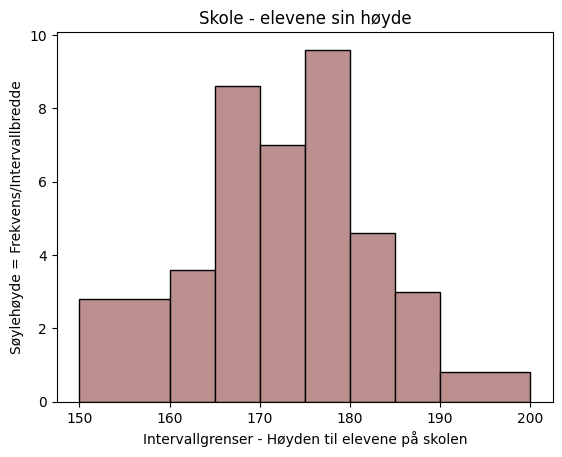

In [4]:
# Lage histogram og finne totalt antall frekvenser
import matplotlib.pyplot as plt

# Definer dataene
intervaller = [150, 160, 165, 170, 175, 180, 185, 190, 200]                   # Intervallgrensene altså [0,10> gir 0 og 10 som intervallgrense
frekvenser = [28, 18, 43, 35, 48, 23, 15, 8]                                 # Frekvensene

# Regn ut søylehøyder
soyle_hoyder = []
for i in range(len(frekvenser)):
    intervall_bredde = intervaller[i+1] - intervaller[i]
    soyle_hoyder.append(frekvenser[i] / intervall_bredde)

# Print ut summen av frekvensene
total_frekvenser = sum(frekvenser)
print(f"Totalt antall frekvenser: {total_frekvenser}")

# Plott histogrammet
plt.bar(intervaller[:-1], soyle_hoyder, width=[intervaller[i+1] - intervaller[i] for i in range(len(frekvenser))], align='edge', edgecolor='black', color='rosybrown')

# Sett label på akser og tittel
plt.xlabel('Intervallgrenser - Høyden til elevene på skolen')                        # Endre x-akse navnet
plt.ylabel('Søylehøyde = Frekvens/Intervallbredde')                            # Alltid Søylehøyde = frekvens/intervallbredde
plt.title('Skole - elevene sin høyde')                                              # Endre overkskrift

# Vis plottet
plt.show()

Totalt antall frekvenser: 500
Gjennomsnittet er: 30.4
Medianen er: 24.0


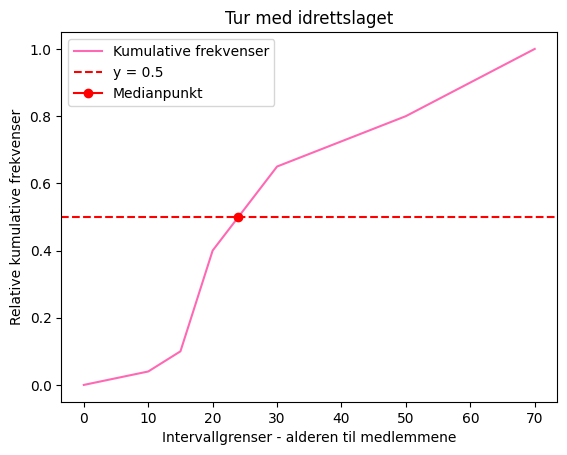

In [3]:
# Finne median og gjennomsnitt i ett klassedelt materiale ofte i forbindelse med ett histogram
import matplotlib.pyplot as plt

# Intervallgrenser og frekvenser
intervaller = [0, 10, 15, 20, 30, 50, 70]               # Intervallgrensene altså [0,10> gir 0 og 10 som intervallgrense
frekvenser = [20, 30, 150, 125, 75, 100]                # Frekvensene

# Finn midtpunktene
midtpunkter = [(intervaller[i] + intervaller[i+1]) / 2 for i in range(len(intervaller)-1)]

# Print ut summen av frekvensene
total_frekvenser = sum(frekvenser)
print(f"Totalt antall frekvenser: {total_frekvenser}")

# Regn ut gjennomsnittet
total = sum([midtpunkter[i] * frekvenser[i] for i in range(len(midtpunkter))])
gjennomsnitt = total / sum(frekvenser)
print("Gjennomsnittet er:", round(gjennomsnitt, 1))

# Regn ut medianen
n = sum(frekvenser)
midten = n / 2
cumulative_freq = 0
median = None
for i in range(len(intervaller)-1):
    cumulative_freq += frekvenser[i]
    if cumulative_freq >= midten:
        # Interpoler for å finne medianen nøyaktig
        if cumulative_freq == midten:
            median = (midtpunkter[i] + midtpunkter[i+1]) / 2
        else:
            median = midtpunkter[i]
        break

# Plot de relative kumulative frekvensene mot intervallgrensene
cumulative_freqs = []
cumulative_freq = 0
for i in range(len(intervaller)-1):
    cumulative_freq += frekvenser[i]
    cumulative_freqs.append(cumulative_freq)

rel_cumulative_freq = [0] + [cf / sum(frekvenser) for cf in cumulative_freqs]
plt.plot(intervaller, rel_cumulative_freq, label='Kumulative frekvenser', color='hotpink', linestyle='solid')
plt.axhline(y=0.5, color='red', linestyle='dashed', label='y = 0.5')

# Finn hvor medianen krysser den blå linjen og marker det punktet
for i in range(len(rel_cumulative_freq)-1):
    if rel_cumulative_freq[i] <= 0.5 and rel_cumulative_freq[i+1] >= 0.5:
        x1, y1 = intervaller[i], rel_cumulative_freq[i]
        x2, y2 = intervaller[i+1], rel_cumulative_freq[i+1]
        m = (y2 - y1) / (x2 - x1)
        x = x1 + (0.5 - y1) / m
        plt.plot(x, 0.5, marker='o', color='red', label='Medianpunkt')
        break

# Legg til en overskrift
plt.title("Tur med idrettslaget")                                    # Endre overskriften
plt.xlabel("Intervallgrenser - alderen til medlemmene")              # Endre x-akse navnet
plt.ylabel("Relative kumulative frekvenser")                         # Endre y-akse navnet
plt.legend()
plt.grid(False)
print("Medianen er:", round(x, 1))
plt.show()

# $\color{coral}{\text{Kapittel 6 - Geometri}}$
Utforske og forklare hvordan formlikhet, målestokk og egenskaper ved geometriske figurer kan brukes i beregninger og i praktisk arbeid

In [7]:
# Delkapittel 3.8 Formlikhetskalkulator - KORRIGERT OG FORBEDRET
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import numpy as np
from itertools import permutations
import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=UserWarning, module='matplotlib')

def get_triangle_coordinates(s, v):
    """
    Calculates vertex coordinates for a triangle given its sides and angles.
    Uses a robust Side-Angle-Side (SAS) approach for plotting.
    s = [s0, s1, s2], v = [v0, v1, v2]
    """
    # Check triangle inequality if all sides are known
    if all(side > 1e-6 for side in s):
        sides_sorted = sorted(s)
        if sides_sorted[0] + sides_sorted[1] <= sides_sorted[2] + 1e-6: # Add tolerance
            return None  # Invalid triangle

    s0, s1, s2 = s
    v0, v1, v2 = (np.radians(angle) for angle in v)

    # Prioritize SAS construction for stability.
    # Case 1: Angle v0 (between s1 and s2) is known.
    if s1 > 1e-6 and s2 > 1e-6 and v[0] > 1e-6:
        A = (0, 0)
        B = (s2, 0)
        C = (s1 * np.cos(v0), s1 * np.sin(v0))
        return [A, B, C]
    # Case 2: Angle v1 (between s0 and s2) is known.
    elif s0 > 1e-6 and s2 > 1e-6 and v[1] > 1e-6:
        B = (0, 0)
        A = (s2, 0)
        C = (s0 * np.cos(v1), s0 * np.sin(v1))
        # Return in standard A, B, C order
        return [A, B, C]
    # Case 3: Angle v2 (between s0 and s1) is known.
    elif s0 > 1e-6 and s1 > 1e-6 and v[2] > 1e-6:
        C = (0, 0)
        B = (s0, 0)
        A = (s1 * np.cos(v2), s1 * np.sin(v2))
        return [A, B, C]

    return None # Not enough information for a stable plot

def beregn_geometri_synthesis(sider_in, vinkler_in, num_sides, num_figures, correspondence_maps_raw):
    sider = list(sider_in)
    vinkler = list(vinkler_in)
    logg = []

    def log_change(message):
        if message not in logg:
            logg.append(message)
        return True

    correspondence = {}
    if correspondence_maps_raw:
        for fig_target_idx, perm_tuple in correspondence_maps_raw.items():
            if perm_tuple is None: continue
            correspondence[fig_target_idx] = {target_local_idx: ref_local_idx for target_local_idx, ref_local_idx in enumerate(perm_tuple)}

    for iteration in range(10):
        made_change_in_iteration = False

        # 1. Intra-figure calculations
        for f_idx in range(num_figures):
            start_idx = f_idx * num_sides
            current_s = sider[start_idx : start_idx + num_sides]
            current_v = vinkler[start_idx : start_idx + num_sides]

            # Angle Sum
            known_angles = [v for v in current_v if v > 1e-6]
            unknown_angle_indices = [i for i, v in enumerate(current_v) if v < 1e-6]
            if len(unknown_angle_indices) == 1 and len(known_angles) == num_sides - 1:
                total_angle_sum = 180 * (num_sides - 2)
                missing_angle_val = total_angle_sum - sum(known_angles)
                if missing_angle_val > 1e-6:
                    v_idx_global = start_idx + unknown_angle_indices[0]
                    vinkler[v_idx_global] = missing_angle_val
                    log_change(f"Figur {f_idx+1}: Vinkelsum brukt for vinkel {unknown_angle_indices[0]}.")
                    made_change_in_iteration = True
                    current_v = vinkler[start_idx : start_idx + num_sides]

            if num_sides == 3:
                # --- PYTHAGORAS (CORRECTED LOGIC) ---
                for i in range(3):
                    # Convention: side s_i is opposite angle v_i.
                    # If angle v_i is 90 degrees, then side s_i is the hypotenuse.
                    if abs(current_v[i] - 90) < 1e-6:
                        hyp_idx = start_idx + i
                        kat1_idx = start_idx + (i + 1) % 3
                        kat2_idx = start_idx + (i + 2) % 3

                        hyp_val = sider[hyp_idx]
                        kat1_val = sider[kat1_idx]
                        kat2_val = sider[kat2_idx]

                        # Case 1: Find hypotenuse from the two legs (kateter)
                        if kat1_val > 1e-6 and kat2_val > 1e-6 and hyp_val < 1e-6:
                            sider[hyp_idx] = np.sqrt(kat1_val**2 + kat2_val**2)
                            log_change(f"Figur {f_idx+1}: Pythagoras fant hypotenus s{i}.")
                            made_change_in_iteration = True
                        # Case 2: Find one leg from hypotenuse and the other leg
                        elif hyp_val > 1e-6 and kat1_val > 1e-6 and kat2_val < 1e-6 and hyp_val**2 > kat1_val**2:
                            sider[kat2_idx] = np.sqrt(hyp_val**2 - kat1_val**2)
                            log_change(f"Figur {f_idx+1}: Pythagoras fant katet s{(i + 2) % 3}.")
                            made_change_in_iteration = True
                        elif hyp_val > 1e-6 and kat2_val > 1e-6 and kat1_val < 1e-6 and hyp_val**2 > kat2_val**2:
                            sider[kat1_idx] = np.sqrt(hyp_val**2 - kat2_val**2)
                            log_change(f"Figur {f_idx+1}: Pythagoras fant katet s{(i + 1) % 3}.")
                            made_change_in_iteration = True
                        
                        if made_change_in_iteration:
                           current_s = sider[start_idx : start_idx + num_sides]
                
                # Sine Rule (s_i / sin(v_i) = k)
                known_pairs = [(current_s[i], current_v[i]) for i in range(3) if current_s[i] > 1e-6 and current_v[i] > 1e-6]
                if known_pairs:
                    ratio = known_pairs[0][0] / np.sin(np.radians(known_pairs[0][1]))
                    for i in range(3):
                        # Find side from angle
                        if sider[start_idx+i] < 1e-6 and vinkler[start_idx+i] > 1e-6:
                            sider[start_idx + i] = ratio * np.sin(np.radians(vinkler[start_idx+i]))
                            log_change(f"Figur {f_idx+1}: Sinussetning fant side s{i}.")
                            made_change_in_iteration = True
                        # Find angle from side
                        elif vinkler[start_idx+i] < 1e-6 and sider[start_idx+i] > 1e-6:
                            sin_val = sider[start_idx+i] / ratio
                            if -1 <= sin_val <= 1:
                                # Note: Sine rule can be ambiguous (two solutions). Assume acute angle.
                                vinkler[start_idx + i] = np.degrees(np.arcsin(sin_val))
                                log_change(f"Figur {f_idx+1}: Sinussetning fant vinkel {i}.")
                                made_change_in_iteration = True

                # Cosine Rule (find side)
                for i in range(3):
                    angle_A = current_v[i]
                    side_b = current_s[(i + 1) % 3]
                    side_c = current_s[(i + 2) % 3]
                    if side_b > 1e-6 and side_c > 1e-6 and angle_A > 1e-6 and current_s[i] < 1e-6:
                        val_sq = side_b**2 + side_c**2 - 2 * side_b * side_c * np.cos(np.radians(angle_A))
                        if val_sq > 0:
                            sider[start_idx + i] = np.sqrt(val_sq)
                            log_change(f"Figur {f_idx+1}: Cosinussetning fant side s{i}.")
                            made_change_in_iteration = True

                # Cosine Rule (find angle)
                if sum(1 for s in current_s if s > 1e-6) == 3 and any(v < 1e-6 for v in current_v):
                    for i in range(3):
                        if current_v[i] < 1e-6:
                            side_a = current_s[i]
                            side_b = current_s[(i + 1) % 3]
                            side_c = current_s[(i + 2) % 3]
                            cos_val_num = side_b**2 + side_c**2 - side_a**2
                            cos_val_den = 2 * side_b * side_c
                            if abs(cos_val_den) > 1e-9:
                                cos_val = np.clip(cos_val_num / cos_val_den, -1.0, 1.0)
                                vinkler[start_idx + i] = np.degrees(np.arccos(cos_val))
                                log_change(f"Figur {f_idx+1}: Cosinussetning fant vinkel {i}.")
                                made_change_in_iteration = True

        # 2. Inter-figure calculations (Similarity)
        if num_figures > 1 and correspondence:
            # Sync angles
            for f_target_idx in range(1, num_figures):
                if f_target_idx in correspondence:
                    for target_local_idx, ref_local_idx in correspondence[f_target_idx].items():
                        ref_g_idx = ref_local_idx
                        target_g_idx = f_target_idx * num_sides + target_local_idx
                        if vinkler[ref_g_idx] > 1e-6 and vinkler[target_g_idx] < 1e-6:
                            vinkler[target_g_idx] = vinkler[ref_g_idx]
                            log_change(f"Formlikhet: Vinkel {target_local_idx} (Fig {f_target_idx+1}) satt lik vinkel {ref_local_idx} (Fig 1).")
                            made_change_in_iteration = True
                        elif vinkler[target_g_idx] > 1e-6 and vinkler[ref_g_idx] < 1e-6:
                            vinkler[ref_g_idx] = vinkler[target_g_idx]
                            log_change(f"Formlikhet: Vinkel {ref_local_idx} (Fig 1) satt lik vinkel {target_local_idx} (Fig {f_target_idx+1}).")
                            made_change_in_iteration = True
            
            # Calculate and apply scale factor
            for f_target_idx in range(1, num_figures):
                if f_target_idx not in correspondence: continue
                scale_factor = None
                # Find scale factor from a known pair of corresponding sides
                for tl_idx, rl_idx in correspondence[f_target_idx].items():
                    ref_g_idx = rl_idx
                    target_g_idx = f_target_idx * num_sides + tl_idx
                    if sider[ref_g_idx] > 1e-6 and sider[target_g_idx] > 1e-6:
                        scale_factor = sider[target_g_idx] / sider[ref_g_idx]
                        log_change(f"Formlikhet: Målestokk Fig {f_target_idx+1}/Fig 1 = {scale_factor:.3f} (fra s{tl_idx}/s{rl_idx}).")
                        break
                
                # Apply scale factor to find unknown sides
                if scale_factor is not None:
                    for tl_idx, rl_idx in correspondence[f_target_idx].items():
                        ref_g_idx = rl_idx
                        target_g_idx = f_target_idx * num_sides + tl_idx
                        if sider[ref_g_idx] > 1e-6 and sider[target_g_idx] < 1e-6:
                            sider[target_g_idx] = sider[ref_g_idx] * scale_factor
                            log_change(f"Formlikhet: Side s{tl_idx} (Fig {f_target_idx+1}) beregnet.")
                            made_change_in_iteration = True
                        elif sider[target_g_idx] > 1e-6 and sider[ref_g_idx] < 1e-6:
                            sider[ref_g_idx] = sider[target_g_idx] / scale_factor
                            log_change(f"Formlikhet: Side s{rl_idx} (Fig 1) beregnet.")
                            made_change_in_iteration = True

        if not made_change_in_iteration:
            break
    
    return sider, vinkler, logg

class FormlikhetApp(widgets.VBox):
    def __init__(self):
        super().__init__()
        # Simplified state management
        self.side_inputs, self.angle_inputs, self.corr_widgets = [], [], []
        self._ui_update_active = False # Flag to prevent observer loops
        self._create_ui()

    def _create_ui(self):
        style = {'description_width': 'initial'}
        self.num_sides_slider = widgets.IntSlider(value=3, min=3, max=4, description='Antall kanter:', style=style)
        self.num_figures_slider = widgets.IntSlider(value=2, min=1, max=2, description='Antall figurer:', style=style)
        self.solve_button = widgets.Button(description="Beregn", icon="calculator", button_style='info')
        reset_button = widgets.Button(description="Nullstill Alt", icon="refresh", button_style='danger')
        
        self.form_container = widgets.VBox()
        self.output_area = widgets.Output(layout={'border': '1px solid black', 'padding': '5px'})
        self.log_output = widgets.Output(layout={'border': '1px solid #ccc', 'padding': '5px', 'margin_top': '10px'})

        self.children = [widgets.HTML(value="<h2>Formlikhetskalkulator</h2>"),
                         widgets.HBox([self.num_sides_slider, self.num_figures_slider]),
                         widgets.HBox([self.solve_button, reset_button]),
                         self.form_container, self.output_area, self.log_output]
        
        self.num_sides_slider.observe(self._rebuild_form, 'value')
        self.num_figures_slider.observe(self._rebuild_form, 'value')
        self.solve_button.on_click(self._solve_geometry)
        reset_button.on_click(self._reset_all)
        self._rebuild_form()

    def _rebuild_form(self, change=None):
        self._ui_update_active = True
        self.side_inputs.clear(); self.angle_inputs.clear(); self.corr_widgets.clear()
        num_sides, num_figures = self.num_sides_slider.value, self.num_figures_slider.value
        
        v_names_global = [chr(65 + j) for j in range(26)]
        figur_bokser = []
        for i in range(num_figures):
            v_names = v_names_global[i * num_sides : (i + 1) * num_sides]
            s_widgets = [widgets.FloatText(description=f"Side s{k} (motsatt {v_names[k]}):", layout={'width': '250px'}) for k in range(num_sides)]
            a_widgets = [widgets.FloatText(description=f"Vinkel {v_names[k]}:", layout={'width': '200px'}) for k in range(num_sides)]
            self.side_inputs.extend(s_widgets)
            self.angle_inputs.extend(a_widgets)

            corr_box_content = []
            if i > 0:
                ref_v_names = v_names_global[0 : num_sides]
                perms = list(permutations(range(num_sides)))
                options = {"Velg korrespondanse...": None}
                for p in perms:
                    opt_text = ", ".join([f"{v_names[target_idx]}↔{ref_v_names[ref_idx]}" for target_idx, ref_idx in enumerate(p)])
                    options[opt_text] = p
                dropdown = widgets.Dropdown(options=options, description=f"Fig {i+1} ↔ Fig 1:", layout={'width': 'auto'})
                self.corr_widgets.append(dropdown)
                corr_box_content.append(dropdown)
            
            box = widgets.VBox([widgets.HTML(f"<b>Figur {i + 1} ({', '.join(v_names)})</b>"),
                                widgets.HBox([widgets.VBox(s_widgets), widgets.VBox(a_widgets)]),
                                widgets.VBox(corr_box_content), widgets.HTML("<hr>")])
            figur_bokser.append(box)

        self.form_container.children = figur_bokser
        self._ui_update_active = False
        self._reset_all()

    def _reset_all(self, btn=None):
        self._ui_update_active = True
        for widget in self.side_inputs + self.angle_inputs:
            widget.value = 0.0
        for widget in self.corr_widgets:
            widget.value = None
        self._ui_update_active = False
        self._clear_outputs_and_plot()

    def _clear_outputs_and_plot(self):
        with self.output_area:
            clear_output()
            plt.figure(figsize=(5 * self.num_figures_slider.value, 4))
            plt.text(0.5, 0.5, "Input verdier og trykk 'Beregn'", ha='center', va='center')
            plt.axis('off'); plt.show()
        with self.log_output:
            clear_output(); print("Logg vil vises her...")
    
    def _get_correspondence_map(self):
        return {i+1: self.corr_widgets[i].value for i, w in enumerate(self.corr_widgets) if self.corr_widgets[i].value}

    def _solve_geometry(self, btn=None):
        if self._ui_update_active: return
        num_sides, num_figures = self.num_sides_slider.value, self.num_figures_slider.value
        
        s_init = [w.value if w.value > 0 else 0.0 for w in self.side_inputs]
        v_init = [w.value if w.value > 0 else 0.0 for w in self.angle_inputs]

        s_calc, v_calc, logg = beregn_geometri_synthesis(s_init, v_init, num_sides, num_figures, self._get_correspondence_map())
        
        self._ui_update_active = True
        for i, val in enumerate(s_calc): self.side_inputs[i].value = round(val, 3) if val > 1e-6 else 0.0
        for i, val in enumerate(v_calc): self.angle_inputs[i].value = round(val, 2) if val > 1e-6 else 0.0
        self._ui_update_active = False

        self._plot_figures(s_calc, v_calc)
        with self.log_output:
            clear_output(wait=True)
            print("Beregningsteg:\n" + "\n".join(f"- {item}" for item in logg) if logg else "Ingen nye beregninger gjort.")

    def _plot_figures(self, sider_data, vinkler_data):
        with self.output_area:
            clear_output(wait=True)
            num_sides, num_figures = self.num_sides_slider.value, self.num_figures_slider.value
            fig, axs = plt.subplots(1, num_figures, figsize=(5 * num_figures, 4.5), squeeze=False)
            v_names_global = [chr(65 + j) for j in range(26)]

            for f_idx in range(num_figures):
                ax = axs[0, f_idx]
                ax.set_aspect('equal', 'box'); ax.axis('off')
                v_names = v_names_global[f_idx*num_sides : (f_idx+1)*num_sides]
                ax.set_title(f"Figur {f_idx + 1} ({', '.join(v_names)})")

                s_fig = sider_data[f_idx*num_sides : (f_idx+1)*num_sides]
                v_fig = vinkler_data[f_idx*num_sides : (f_idx+1)*num_sides]

                coords = None
                if num_sides == 3:
                    coords = get_triangle_coordinates(s_fig, v_fig)
                elif num_sides == 4:
                    ax.text(0.5, 0.5, "Plotting av firkanter\ner ikke støttet.", ha='center', va='center', transform=ax.transAxes)

                if coords:
                    polygon = plt.Polygon(coords, closed=True, fill=True, edgecolor='blue', facecolor='lightblue', alpha=0.7)
                    ax.add_patch(polygon)
                    
                    # Labels for vertices (A, B, C) and angles
                    for i, (x, y) in enumerate(coords):
                        angle_label = f"{v_fig[i]:.1f}°" if v_fig[i] > 1e-3 else ""
                        ax.text(x, y, f"  {v_names[i]}\n  ({angle_label})", va='center', ha='left', fontsize=9)

                    # Labels for sides
                    for i in range(num_sides):
                        p1, p2 = np.array(coords[i]), np.array(coords[(i + 1) % num_sides])
                        mid_point = (p1 + p2) / 2
                        side_len = s_fig[(i + 2) % num_sides] # Side opposite vertex (i+2) is between vertex i and i+1
                        if side_len > 1e-3:
                            ax.text(mid_point[0], mid_point[1], f"{side_len:.2f}", color='darkred', ha='center', va='center',
                                    bbox=dict(facecolor='white', alpha=0.5, pad=0.1, edgecolor='none'))
                    
                    all_x, all_y = [c[0] for c in coords], [c[1] for c in coords]
                    padding = (max(np.ptp(all_x), np.ptp(all_y))) * 0.15 + 0.5
                    ax.set_xlim(min(all_x) - padding, max(all_x) + padding)
                    ax.set_ylim(min(all_y) - padding, max(all_y) + padding)
                elif num_sides != 4:
                    ax.text(0.5, 0.5, "Ikke nok data til å tegne\neller ugyldig trekant.", ha='center', va='center', transform=ax.transAxes)
            
            plt.tight_layout(pad=1.0); plt.show()

app = FormlikhetApp()
display(app)

FormlikhetApp(children=(HTML(value='<h2>Formlikhetskalkulator</h2>'), HBox(children=(IntSlider(value=3, descri…

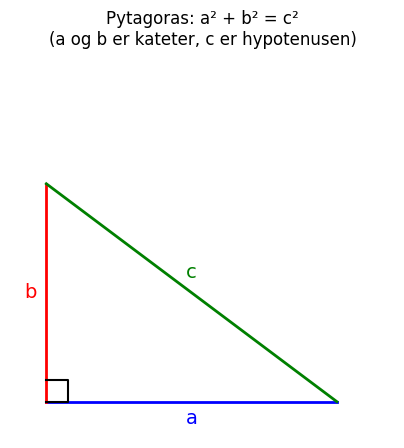

In [24]:
# Pytagora`s setning
import ipywidgets as widgets
from IPython.display import display
import math
import matplotlib.pyplot as plt

# Konverteringsfaktorer til meter
unit_factors = {"m": 1.0, "cm": 0.01, "mm": 0.001}

# --- Introduksjonsfigur ---
def show_intro_triangle():
    fig, ax = plt.subplots(figsize=(5, 5))
    a_demo, b_demo = 4, 3
    c_demo = math.sqrt(a_demo**2 + b_demo**2)

    # Tegn trekanten
    ax.plot([0, a_demo], [0, 0], 'b-', linewidth=2)
    ax.plot([0, 0], [0, b_demo], 'r-', linewidth=2)
    ax.plot([a_demo, 0], [0, b_demo], 'g-', linewidth=2)

    # Etiketter
    ax.text(a_demo/2, -0.3, "a", fontsize=14, color='blue', ha='center')
    ax.text(-0.3, b_demo/2, "b", fontsize=14, color='red', va='center')
    ax.text(a_demo/2, b_demo/2 + 0.2, "c", fontsize=14, color='green', ha='center')  # Mellomting

    # Rettvinkelmarkering
    corner = 0.3
    ax.plot([0, corner, corner, 0], [0, 0, corner, corner], 'k-')

    # Oppsett
    lim = max(a_demo, b_demo) * 1.2
    ax.set_xlim(-0.5, lim)
    ax.set_ylim(-0.5, lim)
    ax.set_aspect('equal', 'box')
    ax.set_title("Pytagoras: a² + b² = c²\n(a og b er kateter, c er hypotenusen)")
    ax.axis('off')
    plt.show()

# Vis introduksjonsfigur
show_intro_triangle()

# --- Smart parser ---
def parse_value_with_unit(text):
    """
    Parserer en verdi med enhet fra tekst, f.eks. '6cm', '3,3mm', '0.06m'.
    Returnerer verdi i meter (float) eller None hvis ugyldig.
    """
    if not text or text.strip() == '':
        return None

    text = text.strip().lower().replace(',', '.')
    # Finn enhet (m, cm, mm)
    if text.endswith('mm'):
        unit = 'mm'; num_str = text[:-2]
    elif text.endswith('cm'):
        unit = 'cm'; num_str = text[:-2]
    elif text.endswith('m'):
        unit = 'm'; num_str = text[:-1]
    else:
        # Hvis ingen enhet, bruk valgt enhet fra dropdown
        unit = unit_dropdown.value
        num_str = text

    try:
        value = float(num_str)
    except ValueError:
        return None

    # Konverter til meter
    faktor = unit_factors[unit]
    return value * faktor

# --- Beregning ---
def calculate_pythagoras_with_mode(modus, a_m, b_m, c_m):
    if modus == 'a':
        if b_m and c_m and c_m > b_m:
            a_m = math.sqrt(c_m**2 - b_m**2)
            return f"Den manglende siden a er {a_m:.2f} m", a_m, b_m, c_m
        else:
            return "Oppgi gyldige verdier: b > 0 og c > b.", a_m, b_m, c_m
    elif modus == 'b':
        if a_m and c_m and c_m > a_m:
            b_m = math.sqrt(c_m**2 - a_m**2)
            return f"Den manglende siden b er {b_m:.2f} m", a_m, b_m, c_m
        else:
            return "Oppgi gyldige verdier: a > 0 og c > a.", a_m, b_m, c_m
    else:
        if a_m and b_m and a_m > 0 and b_m > 0:
            c_m = math.sqrt(a_m**2 + b_m**2)
            return f"Den manglende siden c (hypotenus) er {c_m:.2f} m", a_m, b_m, c_m
        else:
            return "Oppgi gyldige verdier: a > 0 og b > 0.", a_m, b_m, c_m

def draw_triangle(a_u, b_u, c_u, unit_label="m"):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.plot([0, a_u], [0, 0], 'b-', label=f'a = {a_u:.2f} {unit_label}')
    ax.plot([0, 0], [0, b_u], 'r-', label=f'b = {b_u:.2f} {unit_label}')
    ax.plot([a_u, 0], [0, b_u], 'g-', label=f'c = {c_u:.2f} {unit_label}')
    corner = 0.08 * max(a_u, b_u, c_u)
    ax.plot([0, corner, corner, 0], [0, 0, corner, corner], 'k-')
    lim = max(a_u, b_u, c_u) * 1.1
    ax.set_xlim(0, lim); ax.set_ylim(0, lim)
    ax.set_aspect('equal', 'box')
    ax.set_xlabel(f"x ({unit_label})"); ax.set_ylabel(f"y ({unit_label})")
    ax.set_title(f"Trekant (Pytagoras) — enhet: {unit_label}")
    ax.legend(); plt.show()

# --- Widgets ---
mode_dropdown = widgets.Dropdown(
    options=[("Beregn katet a", "a"), ("Beregn katet b", "b"), ("Beregn c (hypotenus)", "c")],
    value="c", description="Modus:"
)
unit_dropdown = widgets.Dropdown(
    options=[("Meter (m)", "m"), ("Centimeter (cm)", "cm"), ("Millimeter (mm)", "mm")],
    value="cm", description="Enhet:"
)
a_input = widgets.Text(description="a:", layout=widgets.Layout(width='400px'))
b_input = widgets.Text(description="b:", layout=widgets.Layout(width='400px'))
c_input = widgets.Text(description="c:", layout=widgets.Layout(width='400px'))
output = widgets.Output()
calc_button = widgets.Button(description="Beregn", button_style='success')

# --- UI-oppdatering ---
def oppdater_ui(change=None):
    modus = mode_dropdown.value
    if modus == 'a':
        a_input.layout.display = 'none'
        b_input.layout.display = ''
        c_input.layout.display = ''
    elif modus == 'b':
        a_input.layout.display = ''
        b_input.layout.display = 'none'
        c_input.layout.display = ''
    else:
        a_input.layout.display = ''
        b_input.layout.display = ''
        c_input.layout.display = 'none'
oppdater_ui()
mode_dropdown.observe(oppdater_ui, names='value')

# --- Beregning ---
def on_calc_button_clicked(b_obj):
    with output:
        output.clear_output()
        modus = mode_dropdown.value
        unit_label = unit_dropdown.value
        faktor = unit_factors[unit_label]

        a_m = parse_value_with_unit(a_input.value) if a_input.layout.display != 'none' else None
        b_m = parse_value_with_unit(b_input.value) if b_input.layout.display != 'none' else None
        c_m = parse_value_with_unit(c_input.value) if c_input.layout.display != 'none' else None

        msg, a_m, b_m, c_m = calculate_pythagoras_with_mode(modus, a_m, b_m, c_m)
        print(msg)

        if a_m and b_m and c_m:
            a_u = a_m / faktor; b_u = b_m / faktor; c_u = c_m / faktor
            print(f"a = {a_u:.2f} {unit_label}")
            print(f"b = {b_u:.2f} {unit_label}")
            print(f"c = {c_u:.2f} {unit_label}")
            draw_triangle(a_u, b_u, c_u, unit_label)
        else:
            print("Kan ikke tegne trekanten.")

calc_button.on_click(on_calc_button_clicked)

# --- Visning ---
ui = widgets.VBox([widgets.HBox([mode_dropdown, unit_dropdown]), a_input, b_input, c_input, calc_button, output])
display(ui)

In [17]:
# Volum og radius til en kule
from math import pi
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from ipywidgets import widgets, VBox, HBox, Output

# Output-område
output = Output()

# Nedtrekksmeny for modusvalg
mode_dropdown = widgets.Dropdown(
    options=[
        ("Beregn volum fra radius", "volum_fra_radius"),
        ("Beregn radius fra volum", "radius_fra_volum"),
    ],
    value="volum_fra_radius",
    description="Modus:",
)

# Nedtrekksmeny for enhet
unit_dropdown = widgets.Dropdown(
    options=[
        ("Meter (m)", "m"),
        ("Centimeter (cm)", "cm"),
        ("Millimeter (mm)", "mm"),
    ],
    value="m",
    description="Enhet:",
)

# Input-felt
radius_input = widgets.FloatText(description="Radius:", value=1.0)
volum_input  = widgets.FloatText(description="Volum:",  value=(4/3)*pi*(1.0**3))

# Beregn-knapp
calc_button = widgets.Button(description="Beregn", button_style='success')

# Konverteringsfaktorer til meter
unit_factors = {
    "m": 1.0,
    "cm": 0.01,
    "mm": 0.001,
}

def oppdater_ui(change=None):
    """Vis/skjul riktig input-felt basert på modus."""
    if mode_dropdown.value == "volum_fra_radius":
        radius_input.layout.display = ''
        volum_input.layout.display  = 'none'
    else:
        radius_input.layout.display = 'none'
        volum_input.layout.display  = ''

oppdater_ui()
mode_dropdown.observe(oppdater_ui, names='value')

def beregn_egenskaper(b):
    with output:
        output.clear_output()
        modus = mode_dropdown.value
        valgt_enhet = unit_dropdown.value
        faktor = unit_factors[valgt_enhet]

        # Les verdier og konverter til meter
        r_val = radius_input.value
        v_val = volum_input.value

        if modus == "volum_fra_radius":
            if r_val is None or r_val <= 0:
                print("Oppgi en positiv radius.")
                return
            radius_m = r_val * faktor  # konverter til meter
            volum_m3 = (4/3) * pi * (radius_m**3)
        else:
            if v_val is None or v_val <= 0:
                print("Oppgi et positivt volum.")
                return
            volum_m3 = v_val * (faktor**3)  # konverter volum til m³
            radius_m = ((3 * volum_m3) / (4 * pi)) ** (1/3)

        overflate_m2 = 4 * pi * (radius_m**2)

        # Konverter tilbake til valgt enhet for radius
        radius_out = radius_m / faktor
        volum_out = volum_m3 / (faktor**3)
        overflate_out = overflate_m2 / (faktor**2)

        # Benevninger
        radius_unit = valgt_enhet
        volum_unit = f"{valgt_enhet}³"
        overflate_unit = f"{valgt_enhet}²"

        # Utskrift
        print(f"Modus: {'Volum fra radius' if modus=='volum_fra_radius' else 'Radius fra volum'}")
        print(f"Radius: {radius_out:.3f} {radius_unit}")
        print(f"Volum: {volum_out:.3f} {volum_unit}")
        print(f"Overflateareal: {overflate_out:.3f} {overflate_unit}")

        # Tegn sfæren i 3D (i valgt enhet)
        fig = plt.figure(figsize=(6, 6))
        ax = fig.add_subplot(111, projection='3d')

        u = np.linspace(0, 2*np.pi, 100)
        v = np.linspace(0, np.pi, 100)
        x = radius_out * np.outer(np.cos(u), np.sin(v))
        y = radius_out * np.outer(np.sin(u), np.sin(v))
        z = radius_out * np.outer(np.ones_like(u), np.cos(v))

        ax.plot_surface(x, y, z, color='skyblue', alpha=0.6, rstride=1, cstride=1, linewidth=0)
        lim = radius_out * 1.2
        ax.set_xlim([-lim, lim])
        ax.set_ylim([-lim, lim])
        ax.set_zlim([-lim, lim])
        try:
            ax.set_box_aspect([1, 1, 1])
        except Exception:
            pass
        ax.set_title(f"3D-modell av sfæren ({valgt_enhet})")
        ax.set_xlabel(f"x ({valgt_enhet})")
        ax.set_ylabel(f"y ({valgt_enhet})")
        ax.set_zlabel(f"z ({valgt_enhet})")
        plt.show()

# Koble knapp til funksjon
calc_button.on_click(beregn_egenskaper)

# Layout
ui = VBox([HBox([mode_dropdown, unit_dropdown]), HBox([radius_input, volum_input]), calc_button, output])
display(ui)